### **Punto 1. Ejercicio Notas de Clase (1.0 puntos).** 
Considere los ejemplos vistos en clase, en los que se analizó
la implementación de los modelos: k-nn, regresión lineal, regresión ridge, regresión lasso, regresión logística. Realice hiperparametrización y validación cruzada usando *(i)* GridSearchCV y Pipeline vs *(ii)*
*Manualmente*, sin usar GridSearchCV y Pipeline (Use ciclos FOR, WHILE, etc,. . . ). Verifique que los
scores obtenidos en los ítems *(i)*-*(ii)* son los mismos. Los ejercicios son los siguientes:
- Breast Cancer: **(KNN, LogisticRegression)** Decida cual es la métrica de mayor importancia en la
aplicación de detección de cancer (métrica de negocio). Utilice esta métrica para la evaluación
y selección del modelo y justifique su respuesta. Los resultados deben ser presentados usando
el Cuadro 1. El estudiante que obtenga el mejor score con esta métrica, será premiado con una
décima para el corte. Los datos deben ser cargados mediante el siguiente par de líneas:
    - **from sklearn.datasets import load_breast_cancer**
    - **cancer = load_breast_cancer()**
- Boston Housing: (LinearRegression, Ridge, Lasso). Utilice la métrica R2 y RMSE durante la
evaluación y selección del modelo. Los resultados deben ser presentados usando el Cuadro 2.
Realice un gráfico en el que muestre en los conjuntos de entrenamiento y test, el precio original
y el predicho. El estudiante que obtenga el mejor score con esta métrica, será premiado con una
décima para el corte. Los datos deben ser cargados mediante el siguiente par de líneas:
    - **import mglearn**
    - **X, y = mglearn.datasets.load_extended_boston())**

### **Breast Cancer: **(KNN, LogisticRegression)****

#### **Liberias:**

In [14]:
# Bibliotecas básicas y configuraciones
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib  # Configuraciones adicionales de matplotlib
import seaborn as sns
import warnings  # Manejo de advertencias
import mglearn  # Visualizaciones adicionales y utilidades

# Ignorar advertencias para limpiar la salida de la consola/notebook
warnings.filterwarnings("ignore")

In [26]:
# Herramientas de sklearn para cargar datos, dividirlos y preprocesarlos
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Modelos de clasificación de sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


# Métricas para evaluación de modelos
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import make_scorer

In [16]:
# Bibliotecas para análisis estadístico
import statsmodels

#### **Importacion de datos:**

In [34]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.insert(0, "diagnosis", data.target)
df_copy = df.copy()
df.head()

diagnosis  mean radius  mean texture  mean perimeter  mean area  \
0          0        17.99         10.38          122.80     1001.0   
1          0        20.57         17.77          132.90     1326.0   
2          0        19.69         21.25          130.00     1203.0   
3          0        11.42         20.38           77.58      386.1   
4          0        20.29         14.34          135.10     1297.0   

   mean smoothness  mean compactness  mean concavity  mean concave points  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   mean symmetry  ...  worst radius  worst texture  worst perimeter  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

#### **Estrutura de los datos:**

##### **Info**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int32  
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area error               5

##### **Tamaño:**

In [6]:
df.shape

(569, 31)

##### **Conteo de nulos:**

In [7]:
null_counts = df.isnull().sum()
print(null_counts)

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


##### **Variables:**

In [8]:
coln = df.columns
print(coln)

Index(['diagnosis', 'mean radius', 'mean texture', 'mean perimeter',
       'mean area', 'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


El DataFrame en cuestión es un compendio de datos médicos que consta de 569 observaciones, cada una representando un caso individual de estudio en el ámbito del diagnóstico de cáncer de mama. Se compone de 31 columnas que reflejan diversas mediciones y características relacionadas con las imágenes de tejido mamario. Entre ellas, encontramos la columna 'diagnosis', que es la única de tipo int32 y se presume que actúa como variable objetivo en un contexto de clasificación, donde los valores se asignan para distinguir entre tejidos benignos y malignos.

Las 30 columnas restantes son de tipo float64 e incluyen un conjunto de atributos descriptivos del tejido mamario. Estos se dividen en tres categorías principales: las características medias ('mean'), los errores ('error'), y los peores valores registrados ('worst').

- **Características 'mean':** Proporcionan los valores promedio de las mediciones realizadas en las células del tejido mamario y abarcan el radio, la textura, el perímetro, el área, la suavidad (smoothness), la compactación (compactness), la concavidad (concavity), los puntos cóncavos (concave points), la simetría y la dimensión fractal del núcleo de la célula.

- **Características de 'error':** Estas columnas capturan la variabilidad o incertidumbre asociada con las mediciones de las características 'mean', y por lo tanto proporcionan una evaluación de la precisión de dichas mediciones.

- **Características 'worst':** Estos valores representan la evaluación más severa o extrema de las características en cada caso, proveyendo un indicador de los peores escenarios encontrados en las muestras.

#### **EDA:**

##### **Target Variables:**

In [9]:
list(data.target_names)

['malignant', 'benign']

##### **Descripcion de los datos:**

In [10]:
df.describe()

diagnosis  mean radius  mean texture  mean perimeter    mean area  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.627417    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      1.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  ...  worst radius  worst texture  worst perimeter  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        worst area  worst smoothness  worst compactness  worst concavity  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       worst concave points  worst symmetry  worst fractal dimension  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

El conjunto de datos de diagnóstico de cáncer de mama de 569 muestras incluye un análisis estadístico descriptivo de 31 características. Estas características se pueden clasificar en tres grupos principales basados en las estadísticas proporcionadas: las características de **'mean'**, **'worst'**, y los errores de medición (**'error'**).

Las **variables objetivo** categorizan los tumores en dos clases: *'malignant'* y *'benign'*. La columna *'diagnosis'* parece ser binaria, con una media de 0.627, lo que sugiere que aproximadamente el 62.7% de los tumores son malignos.

Para cada conjunto de características (mean, error, y worst), se proporcionan estadísticas descriptivas, que incluyen:

- **count:** El número de observaciones no nulas para cada característica. Todas las características cuentan con 569 observaciones, lo que implica un conjunto de datos completo sin valores faltantes.

- **mean:** El valor medio de las observaciones, que varía significativamente entre las características, reflejando la diversidad en las escalas de medida y la heterogeneidad de los tumores.

- **std:** La desviación estándar mide la dispersión de los datos alrededor de la media. Una std más alta indica mayor variabilidad en las mediciones de esa característica.

- **min:** El valor mínimo observado para cada característica, proporcionando un límite inferior para el rango de cada característica.

- **25% (primer cuartil):** El valor debajo del cual se encuentra el 25% de las observaciones. Esto puede indicar una tendencia central para las características en tumores más pequeños o menos agresivos.

- **50% (mediana):** El valor medio que divide las observaciones en dos mitades iguales. Es una medida de tendencia central que es resistente a los valores atípicos.

- **75% (tercer cuartil):** El valor por debajo del cual se encuentra el 75% de las observaciones. Esto puede reflejar la centralidad en características de tumores más grandes o más agresivos.

- **max:** El valor máximo observado para cada característica, estableciendo el límite superior para el rango de datos.

Las características que incluyen **'mean'**, **'worst'**, y **'error'** están asociadas con varios atributos clínicos y morfológicos del tejido mamario analizado, incluyendo el tamaño (radio, perímetro, área), la textura, la compacidad, la concavidad, los puntos cóncavos, la simetría, y la dimensión fractal, tanto en términos de sus valores promedio ('mean'), como en los errores estándar de estos valores ('error'), y los valores peores o más extremos registrados (**'worst'**).

##### **Conteo por diagnosis:**

In [77]:
df.diagnosis.value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

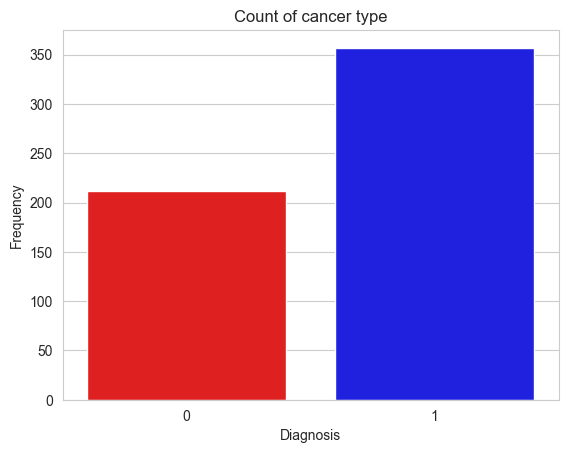

In [12]:
sns.set_style("whitegrid")
palette = {'1': "blue", '0': "red"}
plt.title('Count of cancer type')
sns.countplot(x=df.diagnosis, data=df, palette=palette)
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.show()

El resumen de la variable 'diagnosis' en el DataFrame indica que de las 569 muestras del conjunto de datos de diagnóstico de cáncer de mama, **357 son benignas (representadas por el valor '1')** y **212 son malignas (representadas por el valor '0')**. Esto proporciona una visión inicial del balance de las clases dentro del conjunto de datos: hay más casos benignos que malignos en esta muestra particular.

##### **Histogramas:**

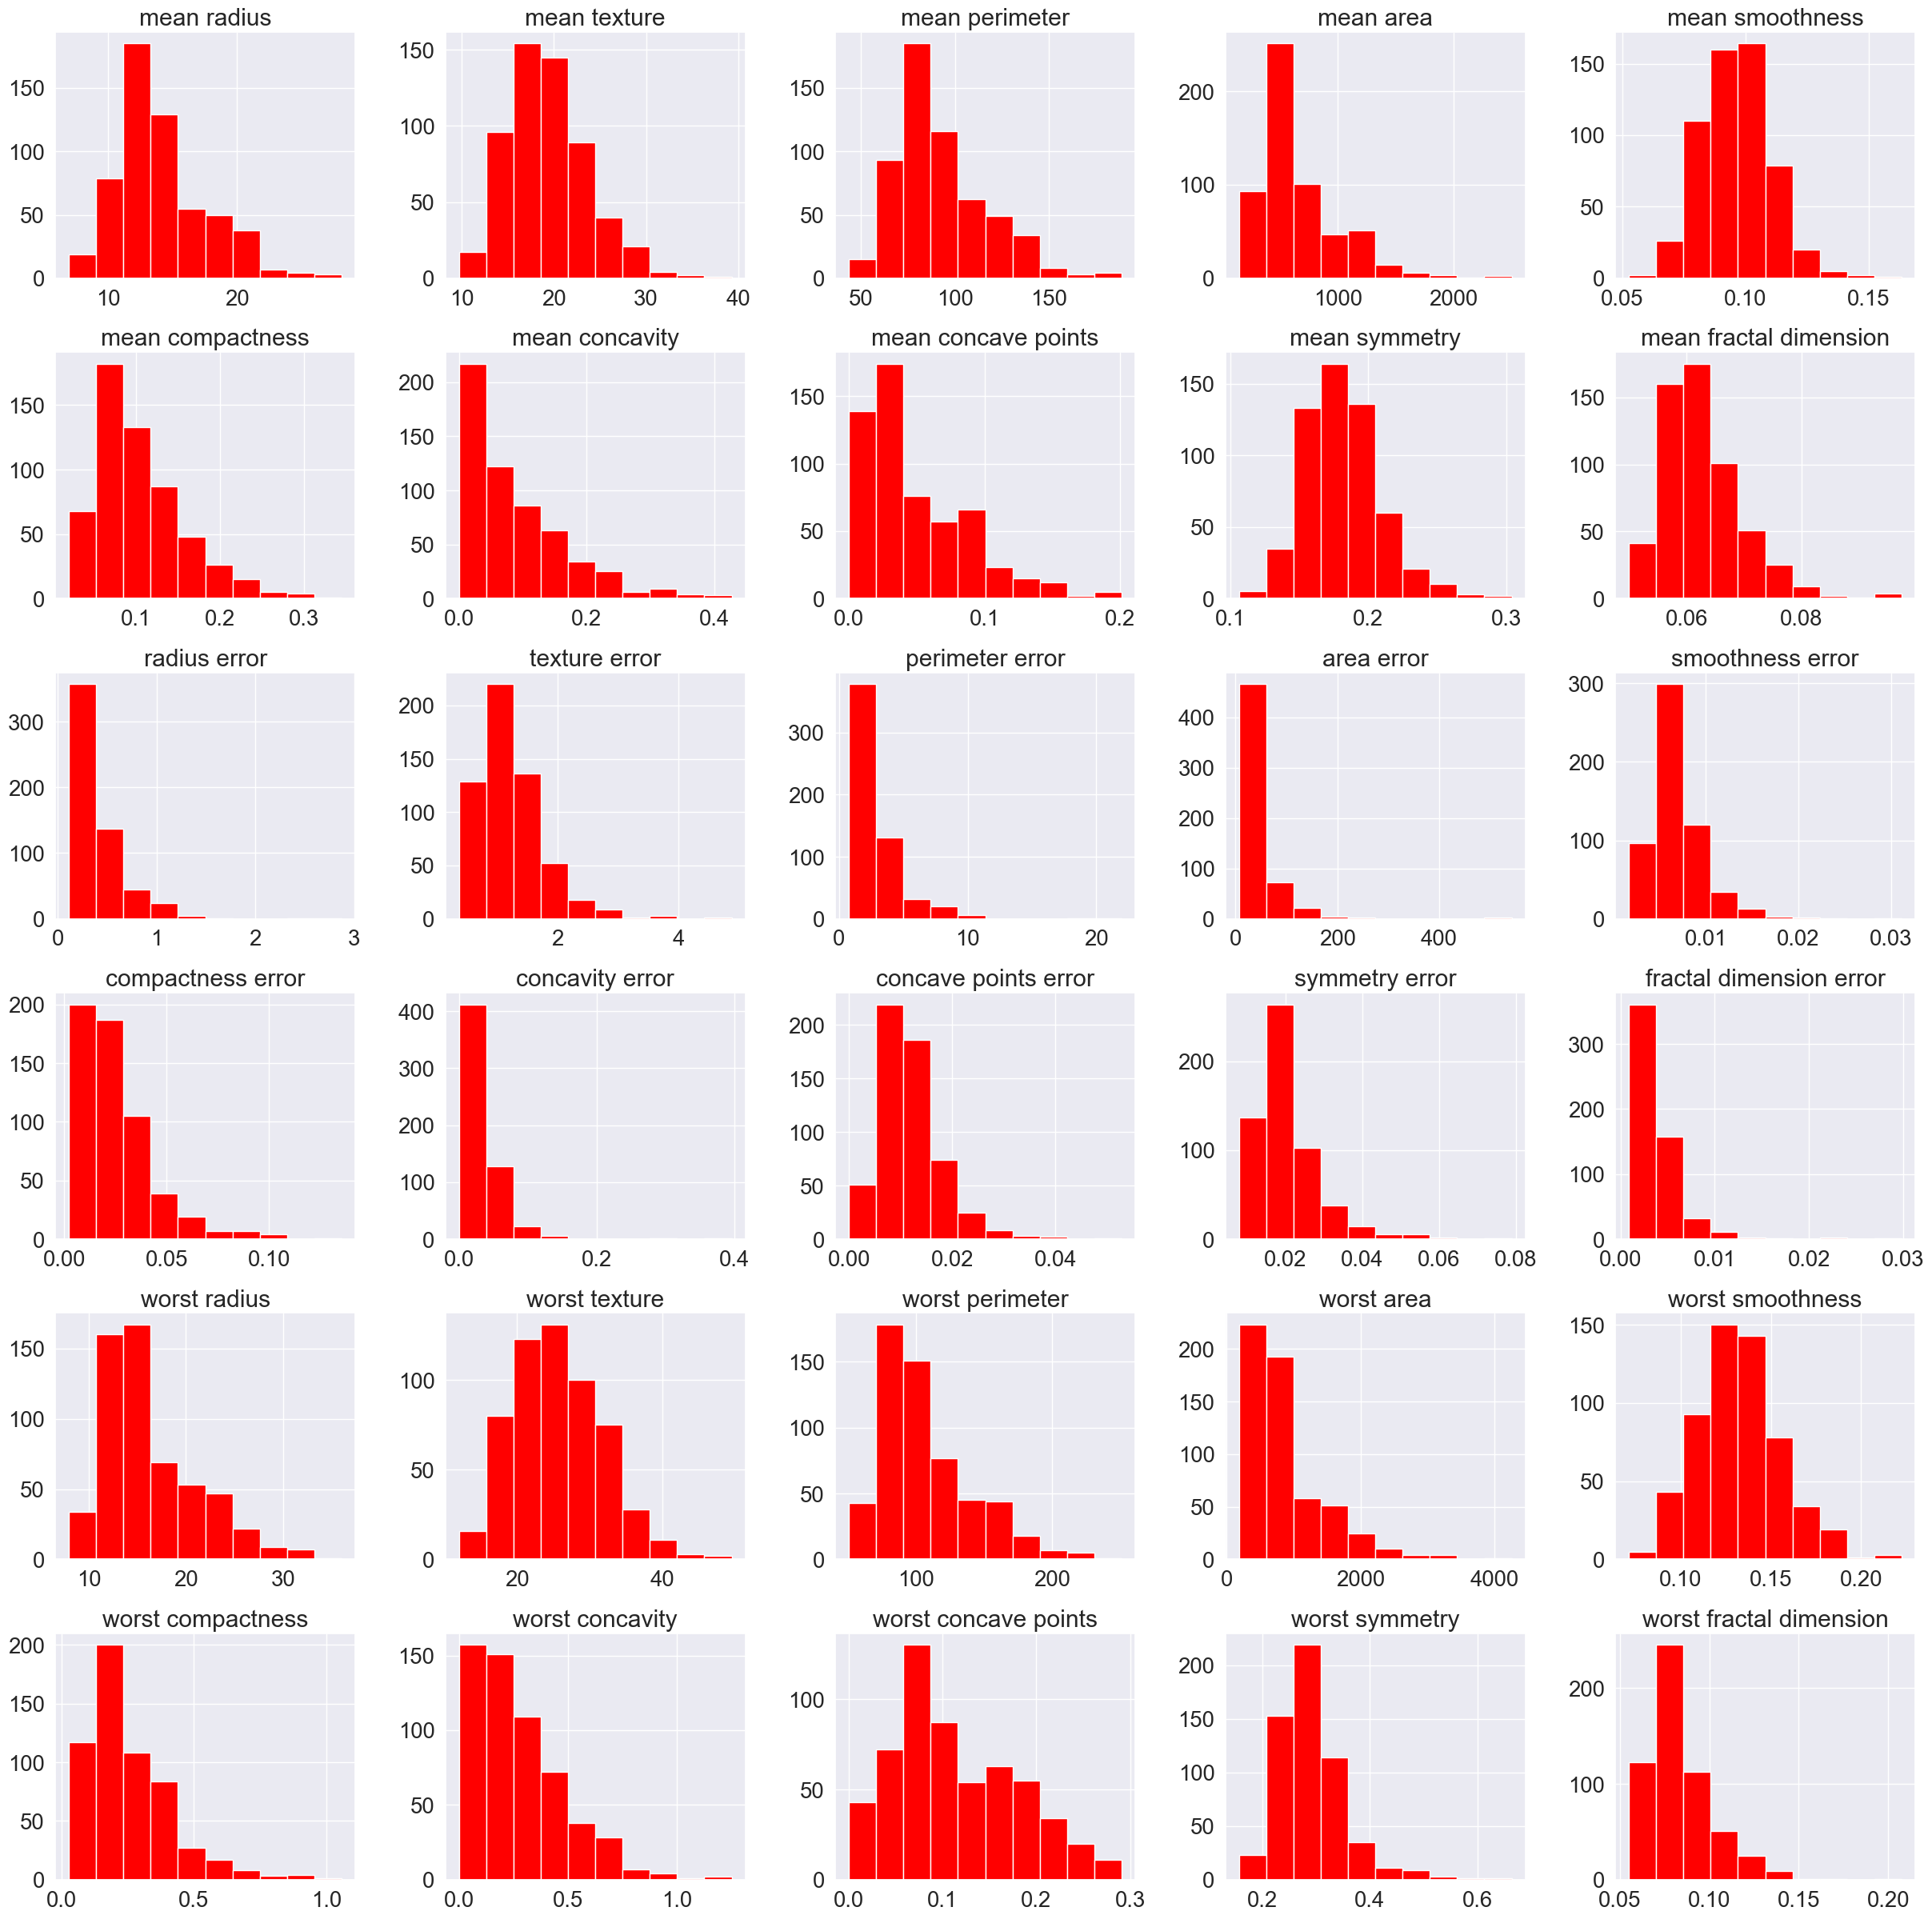

In [13]:
sns.set(font_scale=1.8)
df.iloc[: , 1:].hist(figsize = (30,30), color = 'red');

- **Variables de 'mean':** Estas representan las características promedio del tejido mamario en las imágenes digitalizadas. Los histogramas muestran una amplia gama de distribuciones, con algunas, como el 'mean radius' y 'mean area', que muestran una tendencia hacia valores más bajos, lo que sugiere que la mayoría de los tumores en este conjunto de datos tienden a ser más pequeños en tamaño. Otras, como 'mean smoothness' y 'mean symmetry', tienen distribuciones más simétricas o ligeramente sesgadas, lo que puede indicar una variabilidad menos extrema en estas características en la población de muestras.

- **Variables de 'error':** Representan la variabilidad o el error estándar de las mediciones del grupo 'mean'. Los histogramas de estas variables tienden a estar sesgados hacia la derecha, con la mayoría de los valores agrupados cerca de cero y algunos valores más altos, lo que indica errores de medición pequeños en general con algunos casos más inciertos.

- **Variables 'worst':** Son los peores (máximos) valores observados de las características del tejido mamario. Los histogramas de las variables 'worst' muestran un rango amplio de valores y a menudo presentan un sesgo hacia valores más bajos, indicando que las características extremas son menos comunes. Por ejemplo, el 'worst radius' y el 'worst perimeter' muestran que aunque algunos tumores alcanzan tamaños grandes, la mayoría son más pequeños.

##### **Boxplot:**

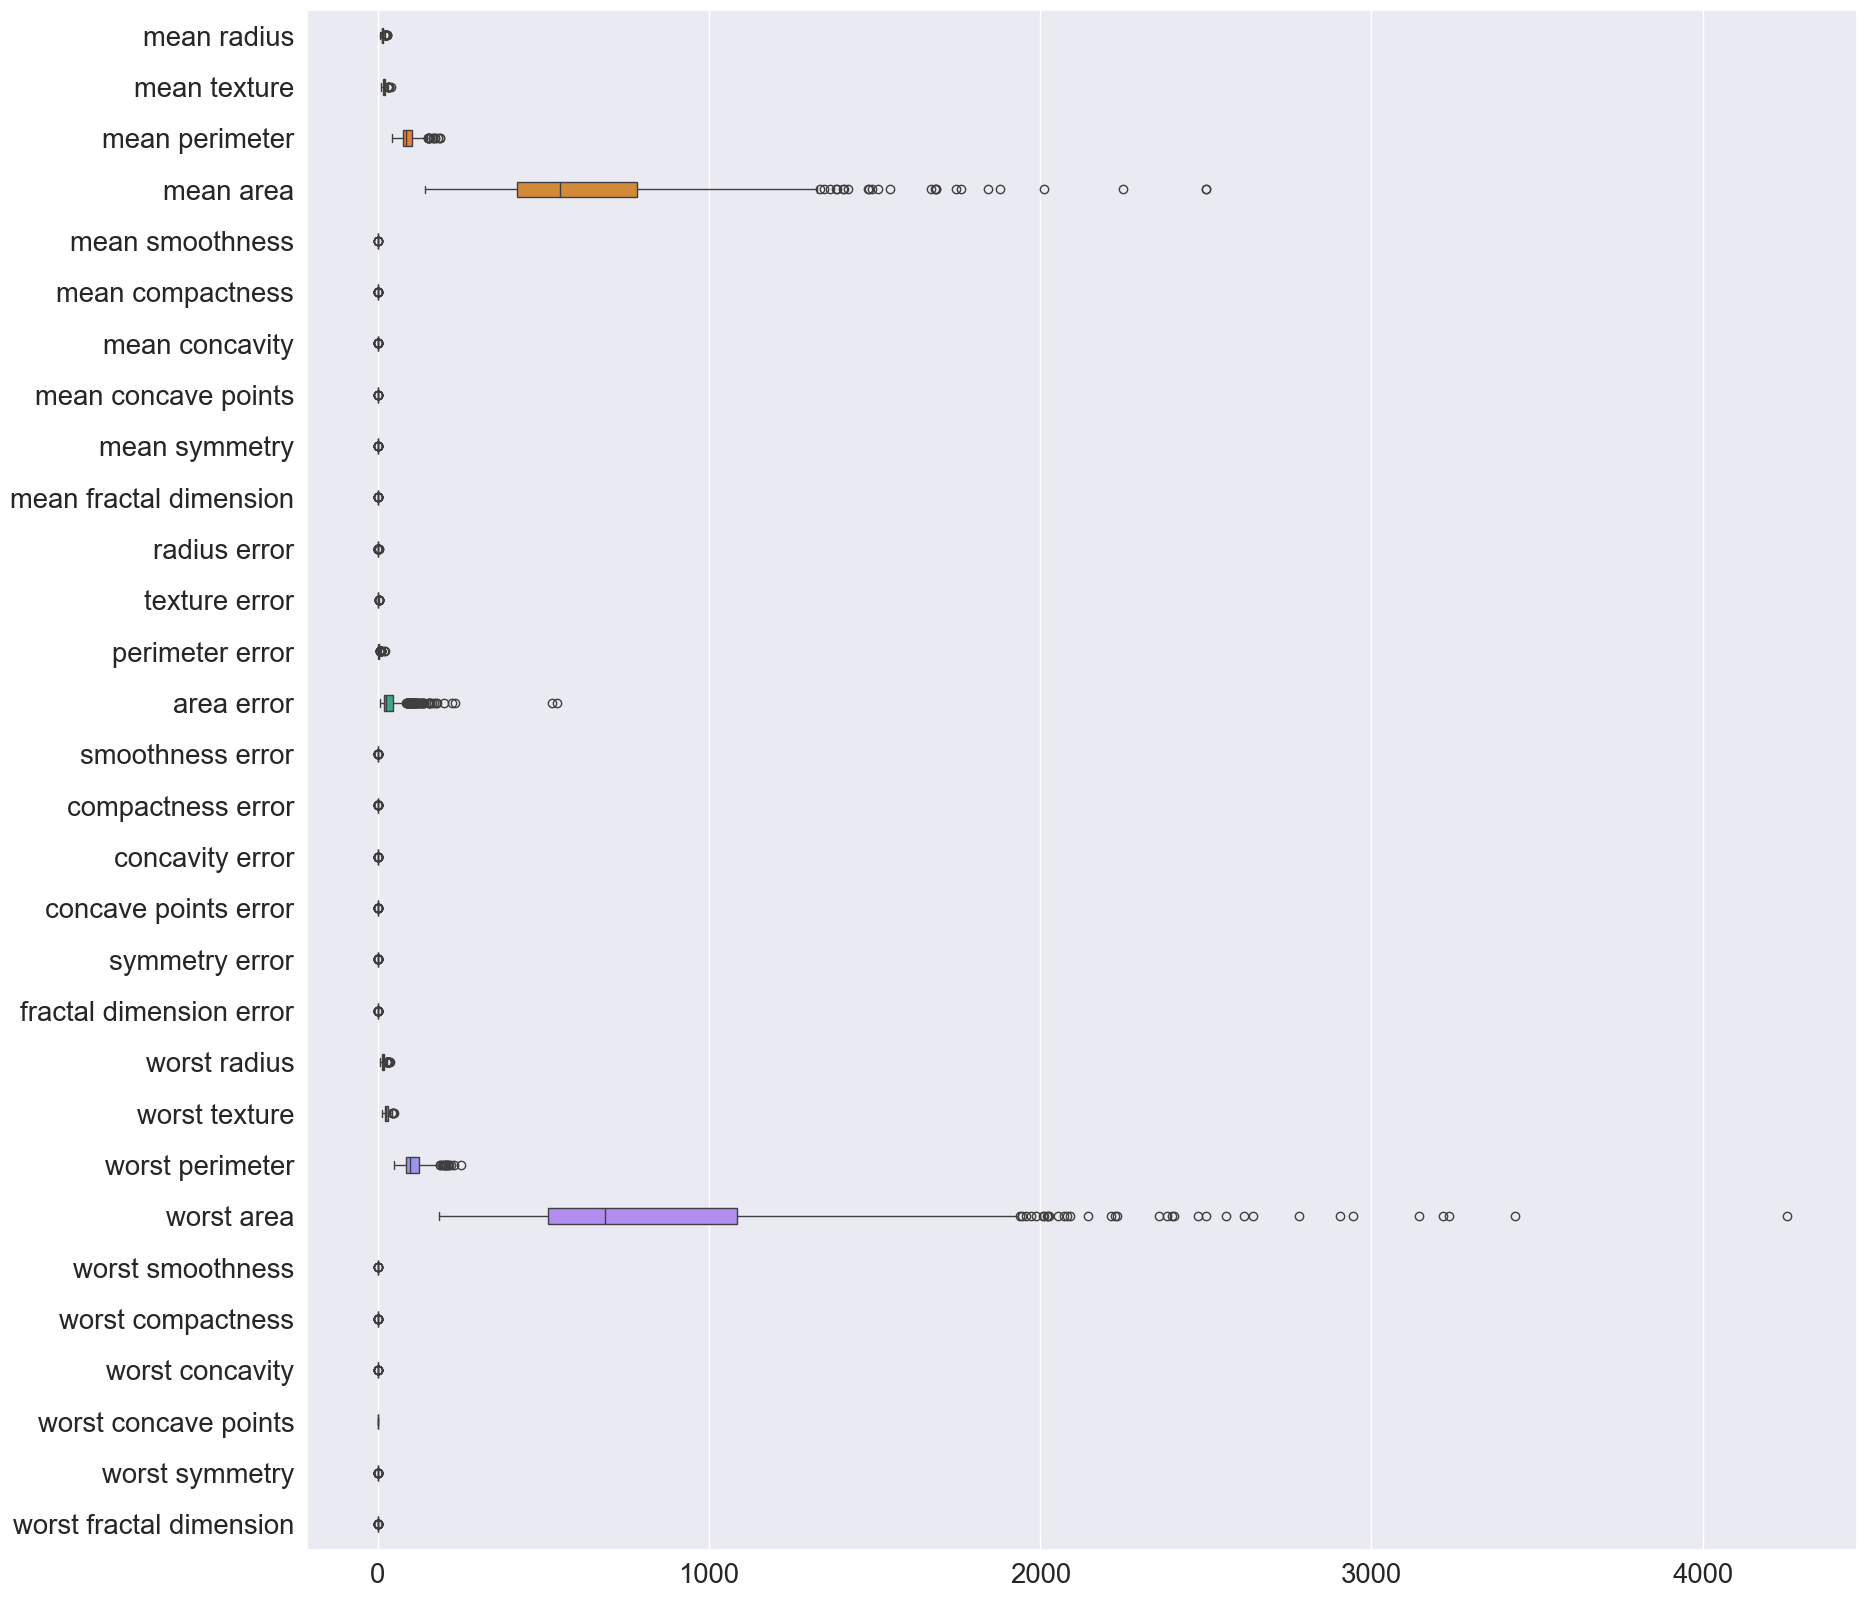

In [14]:
sns.set(font_scale=1.8)
plt.figure(figsize=(20,20))
sns.boxplot(data= df.drop(['diagnosis'], axis=1) ,width=0.3 , saturation=0.9,orient="h");

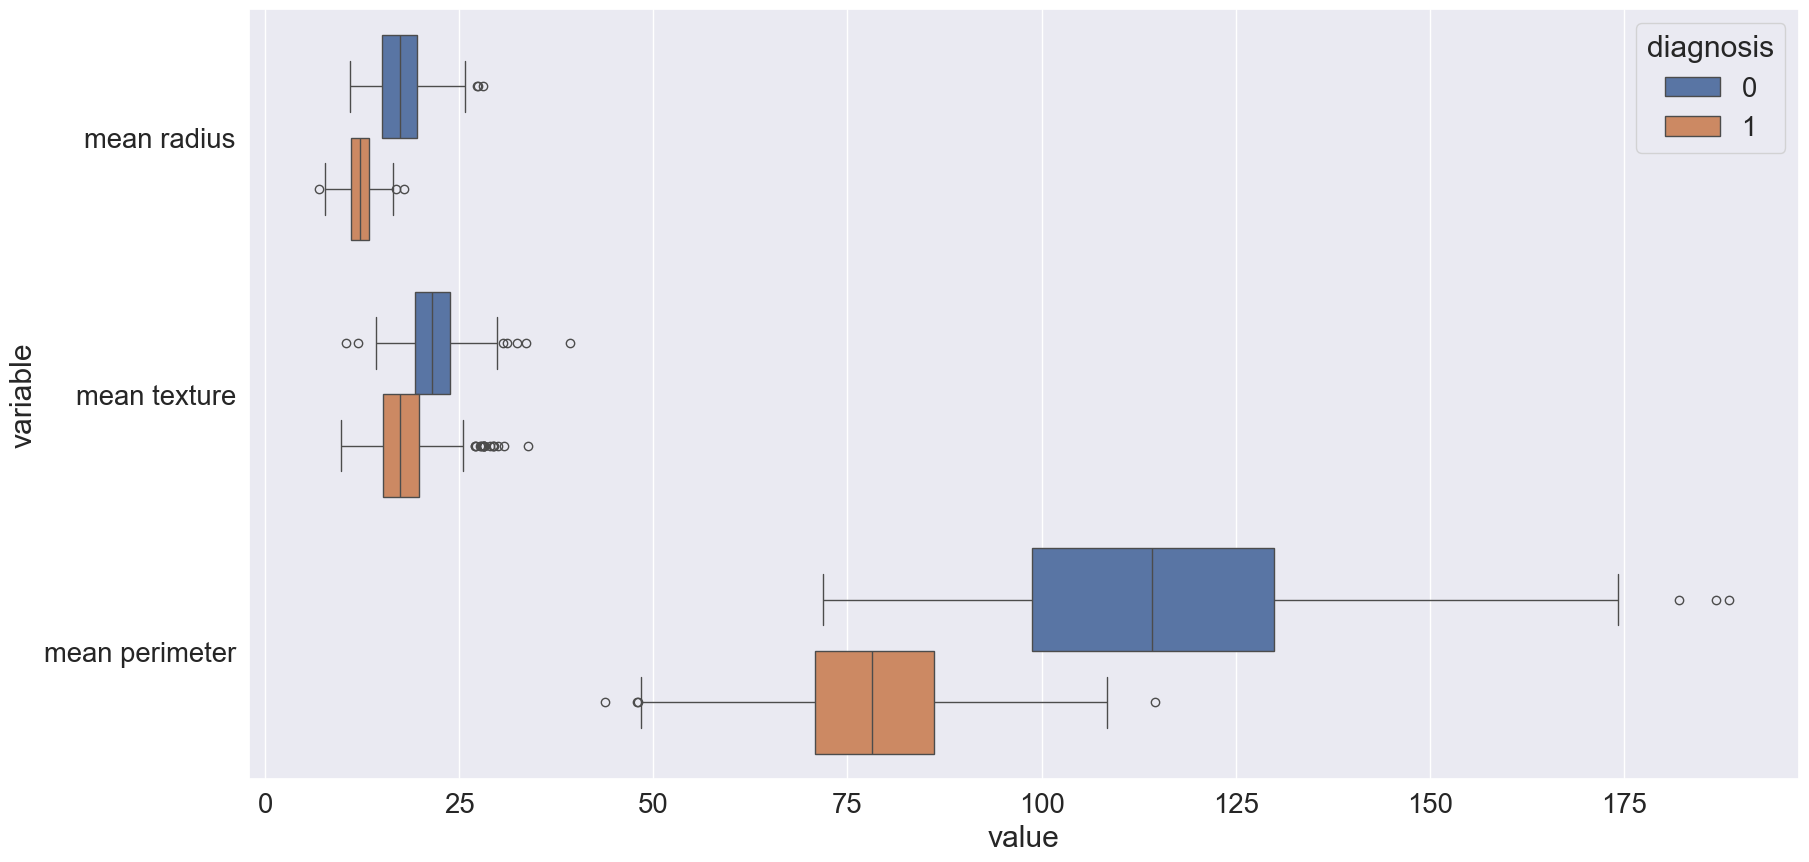

In [15]:
melted_data = pd.melt(df, id_vars = "diagnosis",value_vars = ['mean radius', 'mean texture', 
                                                              'mean perimeter'])
sns.set(font_scale=1.8)
plt.figure(figsize = (20,10))
sns.boxplot(x = "value", y = "variable", hue="diagnosis",data= melted_data);

**Boxplots de 'Mean':** Las cajas muestran la mediana y el rango intercuartílico (IQR) para características promedio del tejido mamario. La mediana, indicada por la línea en el centro de la caja, refleja el valor central de los datos. Las longitudes de las cajas, que van del primer al tercer cuartil, ilustran la variabilidad central de los datos. Los valores atípicos, representados por puntos fuera de los 'bigotes' (líneas que salen de las cajas), son valores que caen fuera del 1.5 IQR y pueden indicar variaciones excepcionales o errores en las mediciones. La presencia de valores atípicos en características como 'mean radius' y 'mean texture' destaca la variabilidad en los tamaños y texturas promedio del tejido mamario.

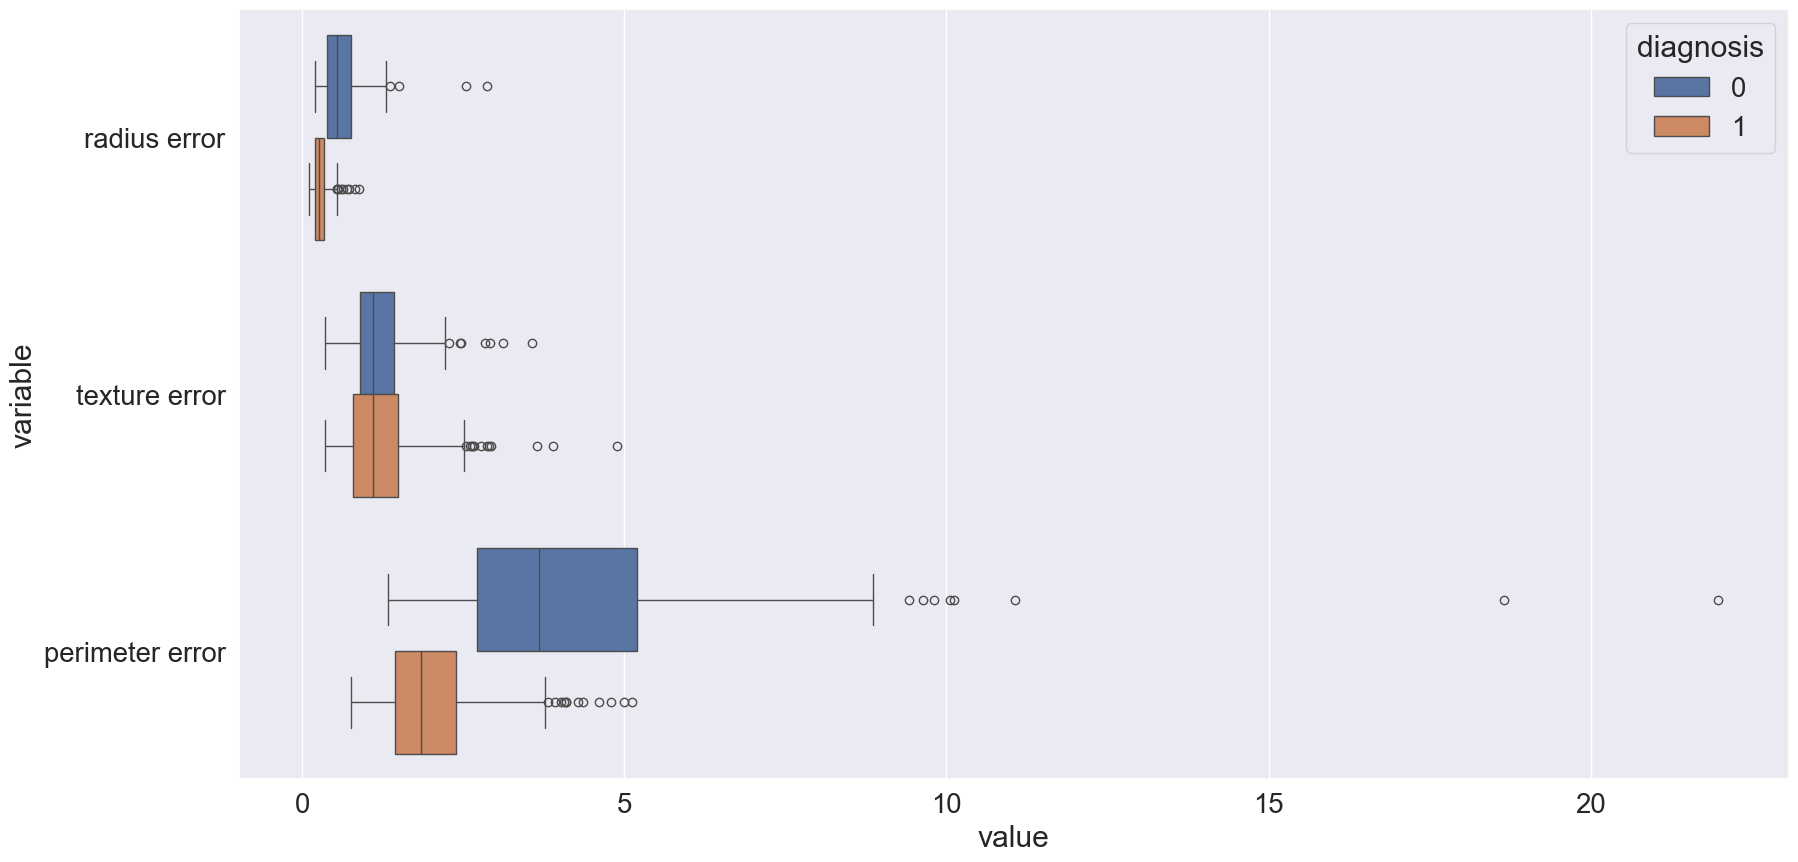

In [16]:
melted_data = pd.melt(df, id_vars = "diagnosis",value_vars = ['radius error', 
                                                              'texture error', 'perimeter error'])
sns.set(font_scale=1.8)
plt.figure(figsize = (20,10))
sns.boxplot(x = "value", y = "variable", hue="diagnosis",data= melted_data);

**Boxplots de 'Error':** Estas cajas indican el rango de error o incertidumbre asociado con las mediciones de las características 'mean'. Observaciones tales como **'radius error'** y **'texture error'** muestran una dispersión notable de los errores de medición, como se ve en el IQR y los valores atípicos. La cantidad de valores atípicos en 'texture error', por ejemplo, sugiere inconsistencias en la medición de la textura que podrían requerir un análisis más detallado.

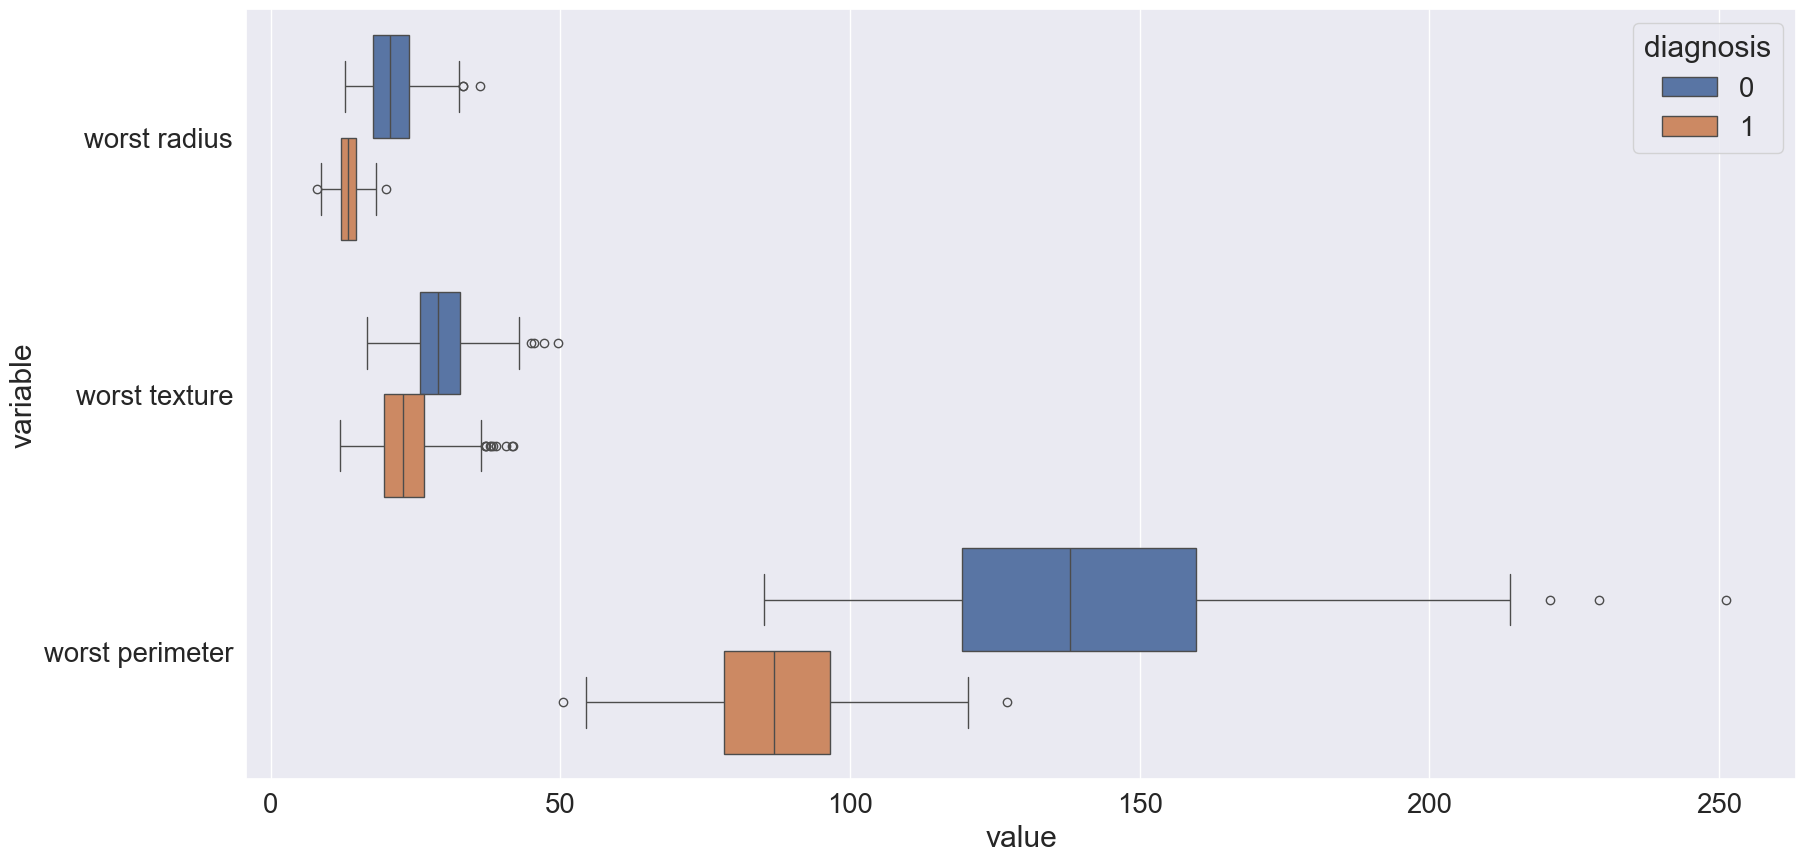

In [17]:
melted_data = pd.melt(df, id_vars = "diagnosis",value_vars = ['worst radius', 
                                                              'worst texture', 'worst perimeter'])
sns.set(font_scale=1.8)
plt.figure(figsize = (20,10))
sns.boxplot(x = "value", y = "variable", hue="diagnosis",data= melted_data);

**Boxplots de 'Worst':** Estos gráficos presentan el peor caso o el valor máximo observado para cada característica. Los boxplots, como los de **'worst radius'** y **'worst texture'**, pueden tener cajas más amplias y numerosos valores atípicos, lo que indica una mayor variabilidad en los valores extremos. Los valores atípicos aquí son especialmente significativos, ya que pueden reflejar las características más agresivas del cáncer.

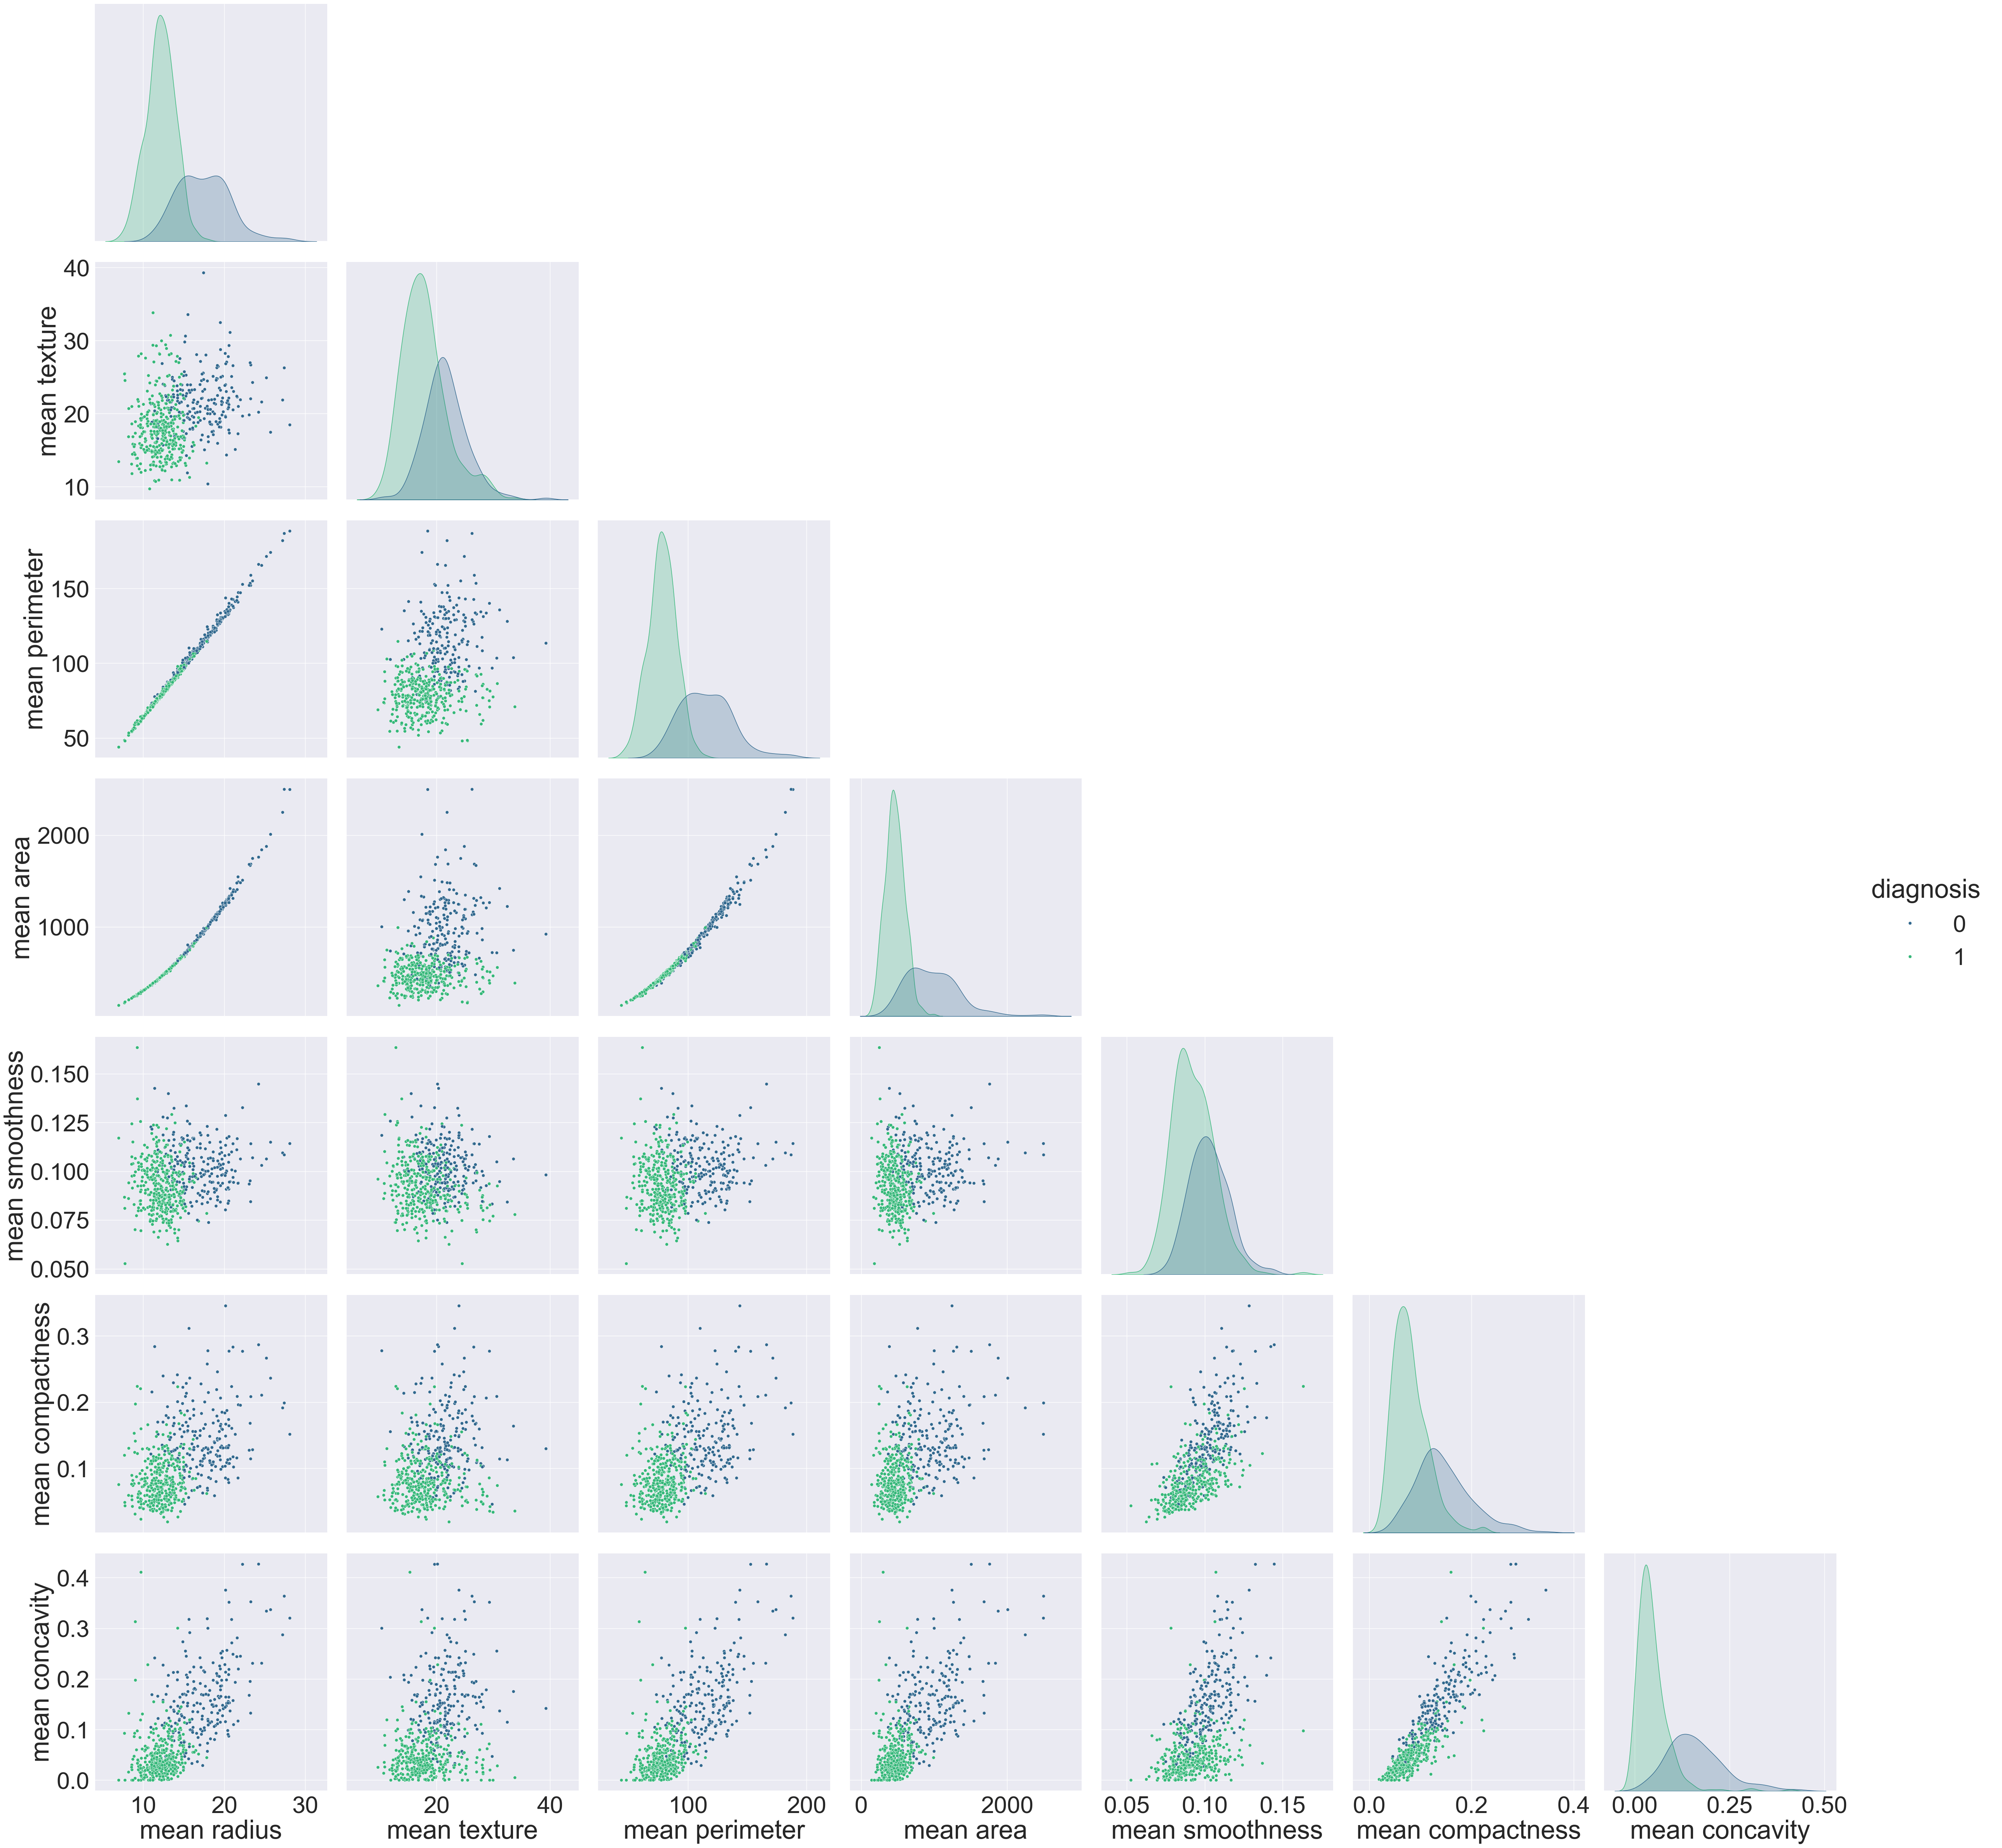

In [18]:
columns = ['diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 
           'mean area', 'mean smoothness', 'mean compactness', 'mean concavity']

sns.set(font_scale=4.0)
sns.pairplot(data=df[columns], hue="diagnosis", palette='viridis', corner=True, height=7.0, aspect=1.0);

**Observaciones**

**Distribución de Variables:**
Las variables como mean area y mean perimeter tienen distribuciones sesgadas, con una cola más larga hacia los valores más altos, lo que puede indicar presencia de valores atípicos.
Algunas variables como mean smoothness y mean compactness presentan una distribución que parece aproximadamente normal, sugiriendo una variación simétrica alrededor de un valor medio.

**Relaciones entre Variables:**
Existen correlaciones positivas claras entre algunas variables como mean radius y mean perimeter, mean radius y mean area, y mean area y mean perimeter. Estas relaciones son lógicas, ya que un mayor radio generalmente implica un mayor perímetro y área.
También se observan tendencias en cómo las características difieren con respecto al diagnóstico: por ejemplo, los tejidos malignos (puntos azules) parecen tener valores más altos en variables como mean area y mean concavity que los benignos (puntos verdes).

**Diferencias por Diagnóstico:**
Los histogramas muestran que para ciertas variables, como mean concavity, hay una distinción visual en la distribución entre los tejidos diagnosticados como malignos y benignos, con tejidos malignos tendiendo a tener valores más altos.
Esto sugiere que algunas de estas características pueden ser indicadores significativos para diferenciar entre tejidos malignos y benignos y podrían ser útiles para el diagnóstico y la clasificación en estudios clínicos.


In [19]:
matplotlib.rc_file_defaults()
sns.set_style("whitegrid")

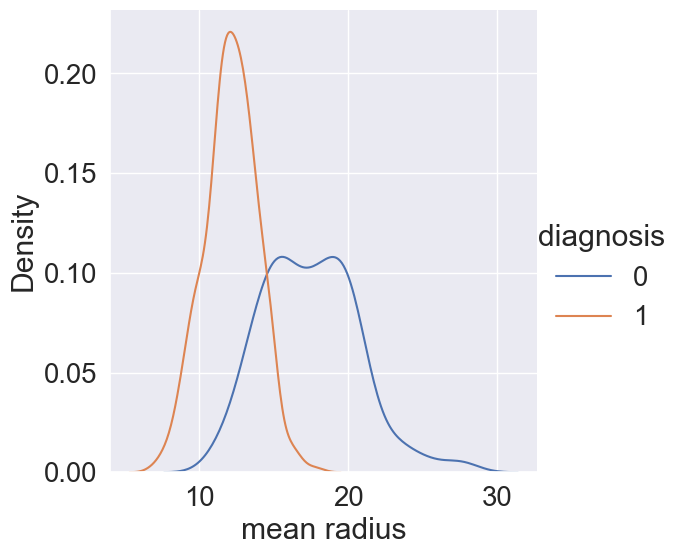

In [78]:
sns.FacetGrid(df, hue="diagnosis", height=6).map(sns.kdeplot, "mean radius").add_legend();


La imagen muestra dos curvas de densidad para la variable 'mean radius' del conjunto de datos de diagnóstico de cáncer de mama, diferenciadas por el diagnóstico: benigno (0) en azul y maligno (1) en naranja. Observamos que los radios promedio de los tumores malignos tienden a ser mayores que los de los tumores benignos. Las dos distribuciones tienen poca superposición, lo que sugiere que 'mean radius' puede ser un buen predictor para diferenciar entre diagnósticos benignos y malignos. 

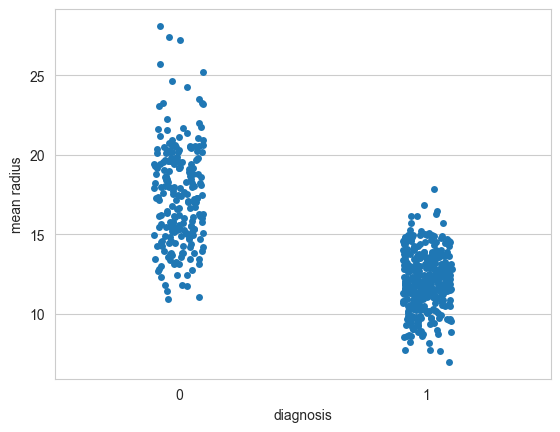

In [21]:
sns.stripplot(x="diagnosis", y="mean radius", data=df, jitter=True, edgecolor="gray");

##### **Correlacion entre variables:**

In [79]:
corr = df.iloc[:, 1:].corr()
corr

mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -0.097317      0.386358       -0.086761  -0.066280   
perimeter error             0.674172      0.281673        0.693135   0.726628   
area error                  0.735864      0.259845        0.744983   0.800086   
smoothness error           -0.222600      0.006614       -0.202694  -0.166777   
compactness error           0.206000      0.191975        0.250744   0.212583   
concavity error             0.194204      0.143293        0.228082   0.207660   
concave points error        0.376169      0.163851        0.407217   0.372320   
symmetry error             -0.104321      0.009127       -0.081629  -0.072497   
fractal dimension error    -0.042641      0.054458       -0.005523  -0.019887   
worst radius                0.969539      0.352573        0.969476   0.962746   
worst texture               0.297008      0.912045        0.303038   0.287489   
worst perimeter             0.965137      0.358040        0.970387   0.959120   
worst area                  0.941082      0.343546        0.941550   0.959213   
worst smoothness            0.119616      0.077503        0.150549   0.123523   
worst compactness           0.413463      0.277830        0.455774   0.390410   
worst concavity             0.526911      0.301025        0.563879   0.512606   
worst concave points        0.744214      0.295316        0.771241   0.722017   
worst symmetry              0.163953      0.105008        0.189115   0.143570   
worst fractal dimension     0.007066      0.119205        0.051019   0.003738   

                         mean smoothness  mean compactness  mean concavity  \
mean radius                     0.170581          0.506124        0.676764   
mean texture                   -0.023389          0.236702        0.302418   
mean perimeter                  0.207278          0.556936        0.716136   
mean area                       0.177028          0.498502        0.685983   
mean smoothness                 1.000000          0.659123        0.521984   
mean compactness                0.659123          1.000000        0.883121   
mean concavity                  0.521984          0.883121        1.000000   
mean concave points             0.553695          0.831135        0.921391   
mean symmetry                   0.557775          0.602641        0.500667   
mean fractal dimension          0.584792          0.565369        0.336783   
radius error                    0.301467          0.497473        0.631925   
texture error                   0.068406          0.046205        0.076218   
perimeter error                 0.296092          0.548905        0.660391   
area error                      0.246552          0.455653        0.617427   
smoothness error                0.332375          0.135299        0.098564   
compactness error               0.318943          0.738722        0.670279   
concavity error                 0.248396          0.570517        0.691270   
concave points error            0.380676          0.642262        0.683260   
symmetry error                 

<Axes: >

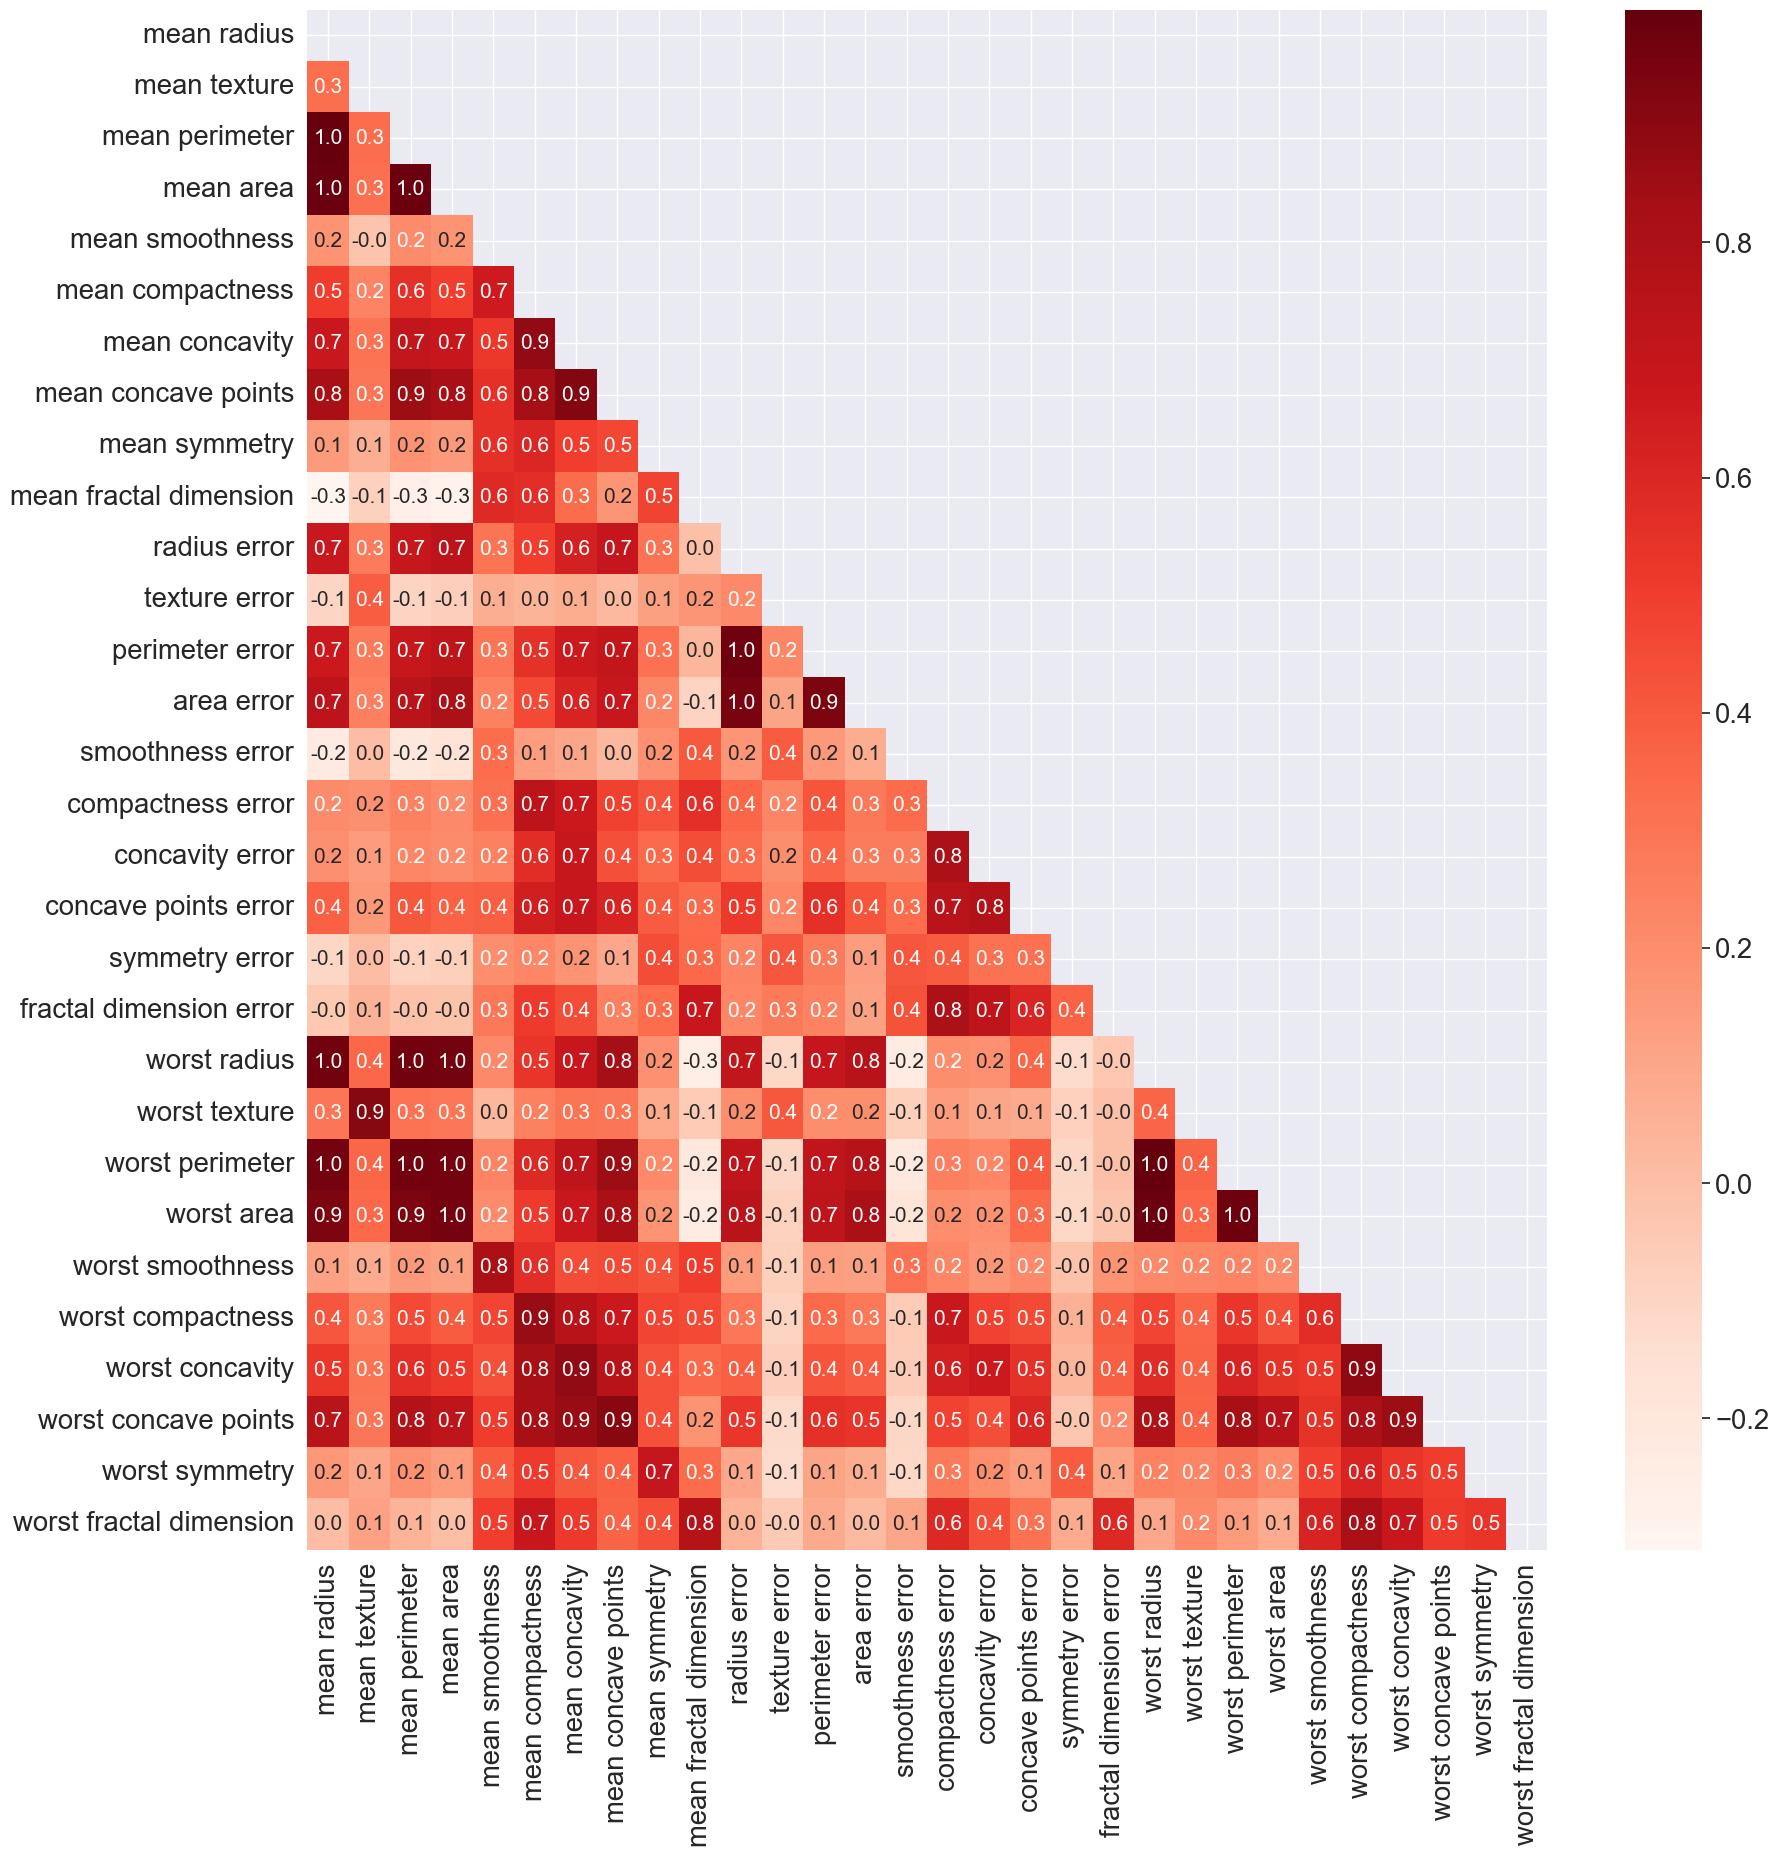

In [56]:
corr.shape
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=1.8)
plt.figure(figsize=(20, 20))
sns.heatmap(
    corr,
    mask=mask,
    cbar=True,
    fmt=".1f",
    annot=True,
    annot_kws={"size": 15},
    cmap="Reds",
)

- **Texture Error:** Tiene una correlación moderada positiva con la mayoría de las otras variables, especialmente con 'smoothness error' (0.40) y 'symmetry error' (0.41). Esto sugiere que cambios en la textura del tejido mamario pueden estar asociados con variaciones en la suavidad y simetría del contorno del núcleo celular.

- **Area Error:** Muestra correlaciones más débiles con otras variables, con la correlación más alta siendo con 'worst concavity' (0.39). Esto indica que los errores en la medición del área podrían estar relacionados de manera leve con la severidad de la concavidad en las células.

- **Smoothness Error:** Exhibe correlaciones moderadas positivas con 'texture error' (0.40) y 'fractal dimension error' (0.43). Esto sugiere que las fluctuaciones en la suavidad del contorno celular pueden estar relacionadas con variaciones en la textura y la dimensión fractal del tejido.

- **Concavity Error:** Muestra una correlación significativa con 'fractal dimension error' (0.73) y 'worst concavity' (0.66), lo que sugiere una fuerte asociación entre los errores en la medición de la concavidad y la complejidad fractal de las células, así como con la gravedad de la concavidad.

- **Symmetry Error:** Tiene una correlación moderada positiva con 'texture error' (0.41) y 'fractal dimension error' (0.37), lo que sugiere una relación entre los errores en la medición de la simetría y la textura del tejido, así como con la complejidad fractal de las células.

- **Fractal Dimension Error:** Muestra una correlación significativa con 'concavity error' (0.73) y 'worst concavity' (0.38), lo que sugiere una fuerte asociación entre los errores en la medición de la dimensión fractal y la gravedad de la concavidad en las células tumorales.

- **Worst Concavity:** Tiene correlaciones moderadas con 'area error' (0.39) y 'concavity error' (0.66), lo que indica una asociación entre la gravedad de la concavidad y los errores en la medición del área y la concavidad de las células tumorales.

A priori se omiten las variables **worst** dada que presentan una lata correlacion entre si, dado que puede ser que tales variables puedan estar explicando lo mismo.

#### **Multicolinealidad:**

In [80]:
cols = ['worst radius', 
        'worst texture', 
        'worst perimeter', 
        'worst area', 
        'worst smoothness', 
        'worst compactness', 
        'worst concavity',
        'worst concave points', 
        'worst symmetry', 
        'worst fractal dimension']
df.drop(cols, inplace=True, axis=1);

In [81]:
cols = ['mean perimeter',
        'mean area',
        'perimeter error', 
        'area error']
df.drop(cols, inplace=True, axis=1);

In [82]:
cols = ['mean concavity',
        'concavity error', 
        'mean concave points', 
        'concave points error']
df.drop(cols, inplace=True, axis=1);

In [83]:
df.columns

Index(['diagnosis', 'mean radius', 'mean texture', 'mean smoothness',
       'mean compactness', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'smoothness error',
       'compactness error', 'symmetry error', 'fractal dimension error'],
      dtype='object')

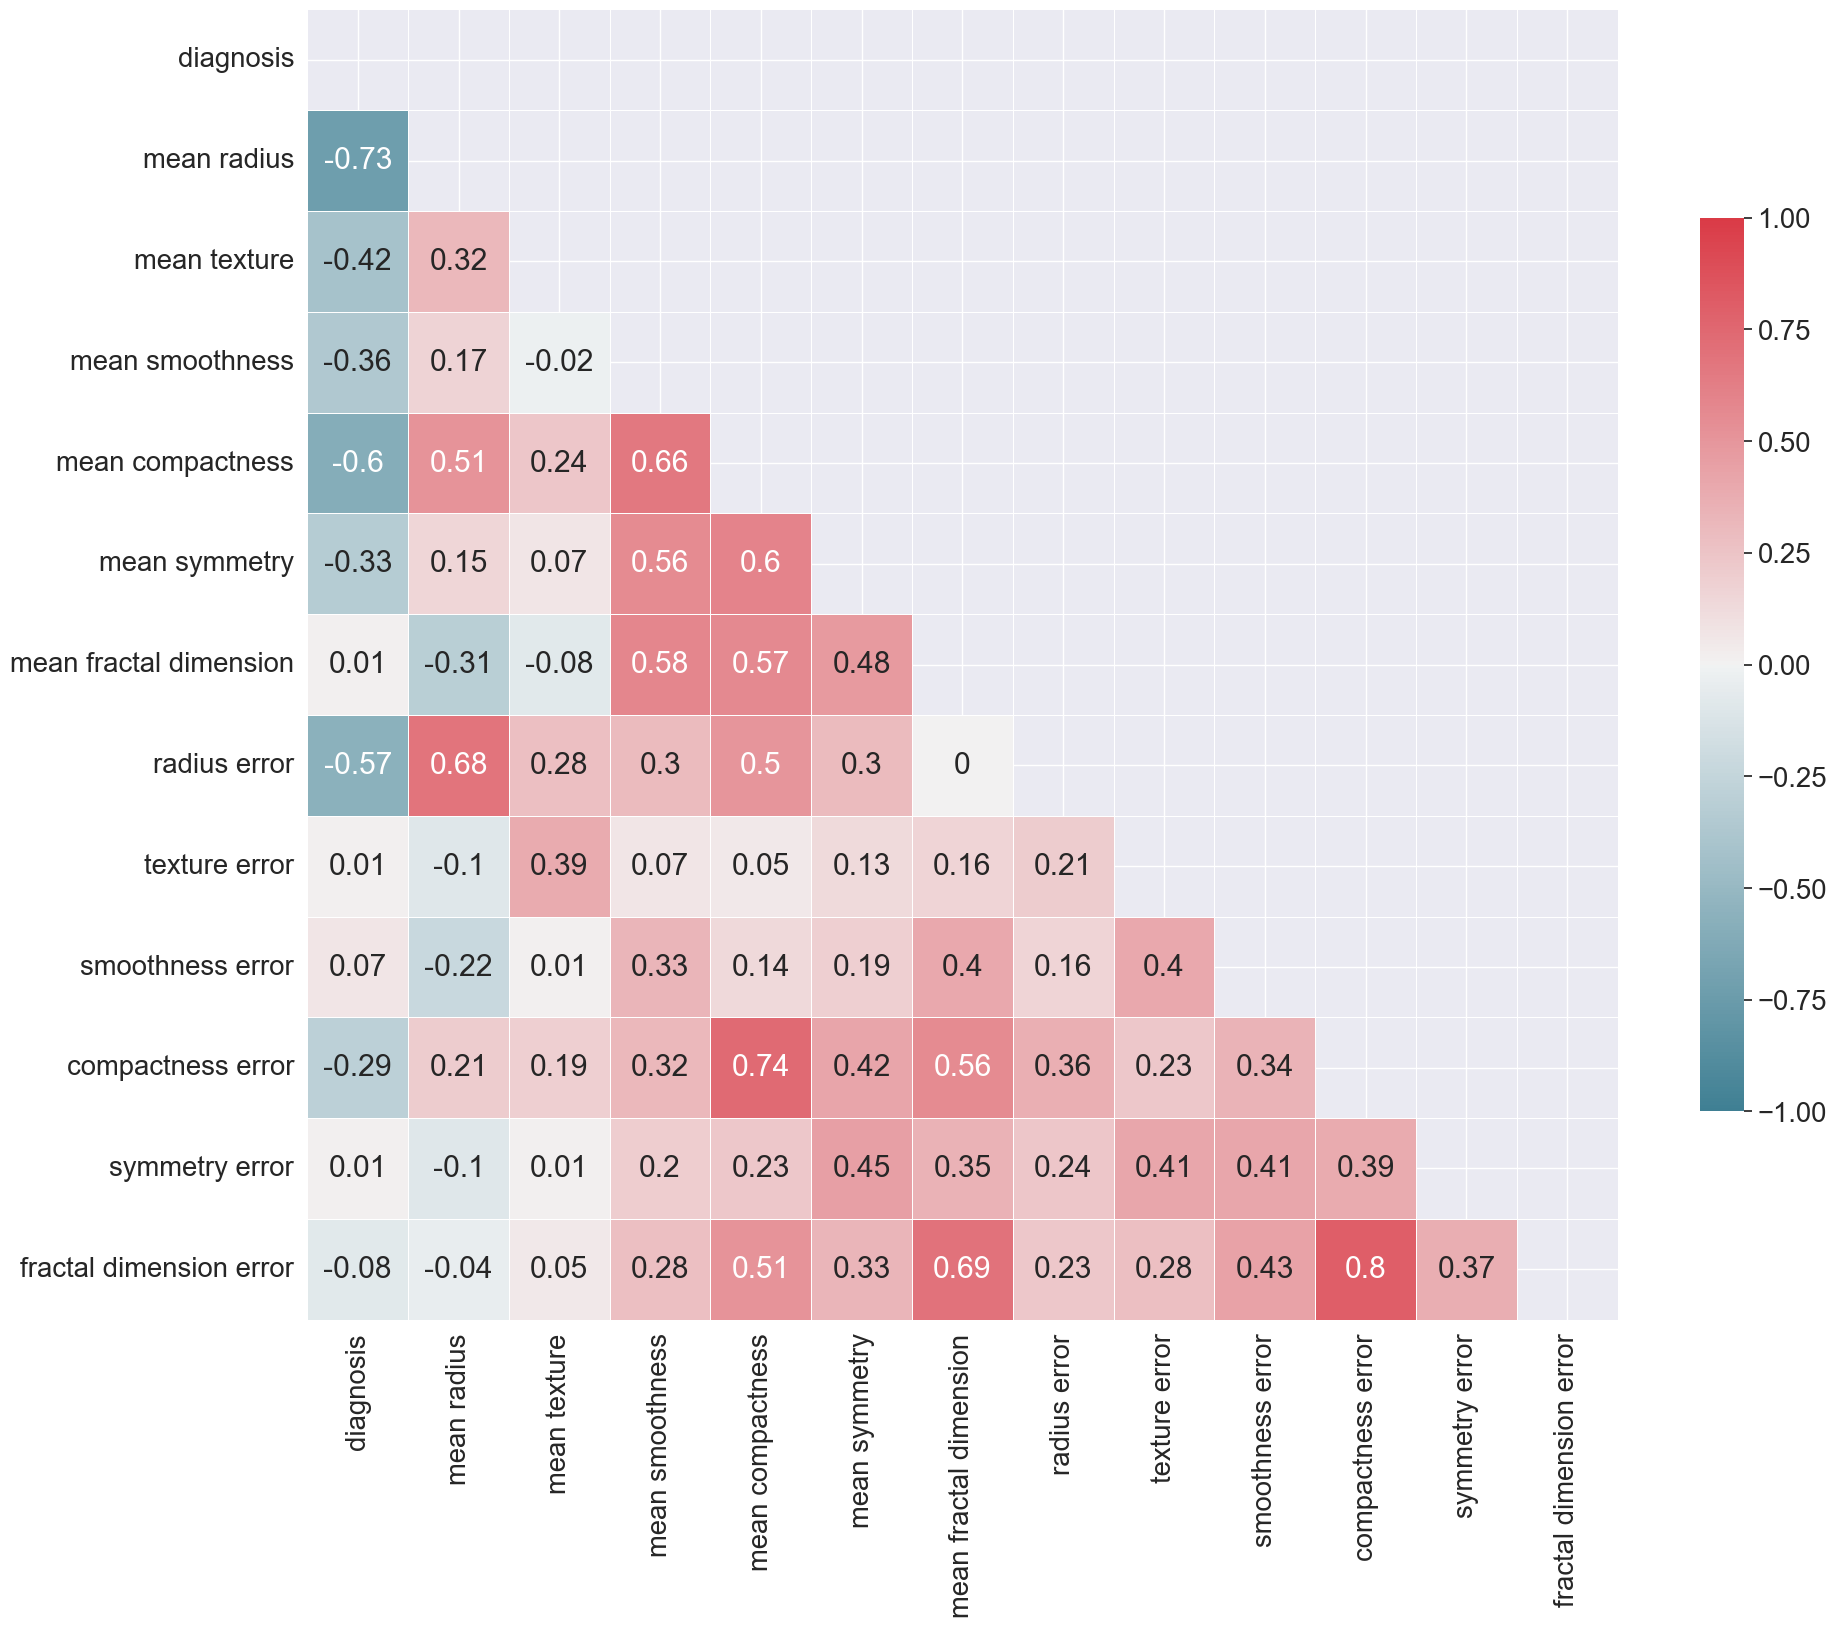

In [84]:
corr = df.corr().round(2)

cmap = sns.diverging_palette(220, 10, as_cmap=True)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=1.8)
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5,
            cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

La observación anterior de que la mayoría de las variables "worst" están altamente correlacionadas sugiere la presencia de multicolinealidad en el conjunto de datos.

En este contexto, es probable que las variables "worst" representen mediciones o características similares, pero tomadas en diferentes momentos o bajo diferentes condiciones. Por ejemplo, 'worst concavity' y 'worst perimeter' podrían estar correlacionados debido a que ambos capturan aspectos de la forma y la estructura del tumor en su estado más severo. Por lo tanto, una estrategia a considerar es eliminar estas variables y quedarnos únicamente con las siguientes: 'diagnosis', 'mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'smoothness error', 'compactness error', 'symmetry error' y 'fractal dimension error'.

#### **Vif:**

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
def VIF_calculation(X):
    # Calcular el VIF para cada variable
    VIF = pd.DataFrame()
    VIF["variable"] = X.columns
    VIF["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    # Ordenar por VIF en orden descendente
    VIF = VIF.sort_values('VIF', ascending=False).reset_index(drop=True)
    
    return VIF

# Llamada a la función para calcular el VIF
VIF_result = VIF_calculation(df.drop("diagnosis", axis=1))  # Excluye la columna "diagnosis"
print(VIF_result)

                   variable           VIF
0               mean radius  63306.172036
1            mean perimeter  58123.586079
2              worst radius   9674.742602
3           worst perimeter   4487.781270
4                 mean area   1287.262339
5                worst area   1138.759252
6    mean fractal dimension    629.679874
7   worst fractal dimension    423.396723
8           mean smoothness    393.398166
9          worst smoothness    375.597155
10            worst texture    343.004387
11             mean texture    251.047108
12             radius error    236.665738
13           worst symmetry    218.919805
14          perimeter error    211.396334
15         mean compactness    200.980354
16            mean symmetry    184.426558
17           mean concavity    157.855046
18      mean concave points    154.241268
19     worst concave points    148.673180
20        worst compactness    132.884276
21          worst concavity     86.310362
22               area error     72

In [39]:
def delete_high_vif_variables(df, target_name, VIF_threshold):
    # Excluir la columna target_name del cálculo de VIF
    X = df.drop(target_name, axis=1)
    
    # Calcular la matriz de VIF
    VIF_mat = VIF_calculation(X)
    
    # Obtener el valor VIF más alto
    highest_VIF = VIF_mat.iloc[0]["VIF"]
    
    # Verificar si hay multicolinealidad
    if highest_VIF <= VIF_threshold:
        print("No multicollinearity detected.")
        return X
    
    # Eliminar variables mientras el VIF sea mayor que el umbral
    while highest_VIF > VIF_threshold:
        variable_to_drop = VIF_mat.iloc[0]["variable"]
        X = X.drop(variable_to_drop, axis=1)
        
        # Recalcular la matriz de VIF
        VIF_mat = VIF_calculation(X)
        highest_VIF = VIF_mat.iloc[0]["VIF"]
    
    print(f"Variables removed based on VIF: {df.shape[1] - X.shape[1]}")
    return pd.concat([X, df[target_name]], axis=1)

# Llamada a la función para eliminar variables con alto VIF
dfsinmulti_after_vif = delete_high_vif_variables(df, "diagnosis", 10)


Variables removed based on VIF: 24


In [40]:
df_after_vif = dfsinmulti_after_vif
df_after_vif.head()

texture error  area error  smoothness error  concavity error  \
0         0.9053      153.40          0.006399          0.05373   
1         0.7339       74.08          0.005225          0.01860   
2         0.7869       94.03          0.006150          0.03832   
3         1.1560       27.23          0.009110          0.05661   
4         0.7813       94.44          0.011490          0.05688   

   symmetry error  fractal dimension error  worst concavity  diagnosis  
0         0.03003                 0.006193           0.7119          0  
1         0.01389                 0.003532           0.2416          0  
2         0.02250                 0.004571           0.4504          0  
3         0.05963                 0.009208           0.6869          0  
4         0.01756                 0.005115           0.4000          0

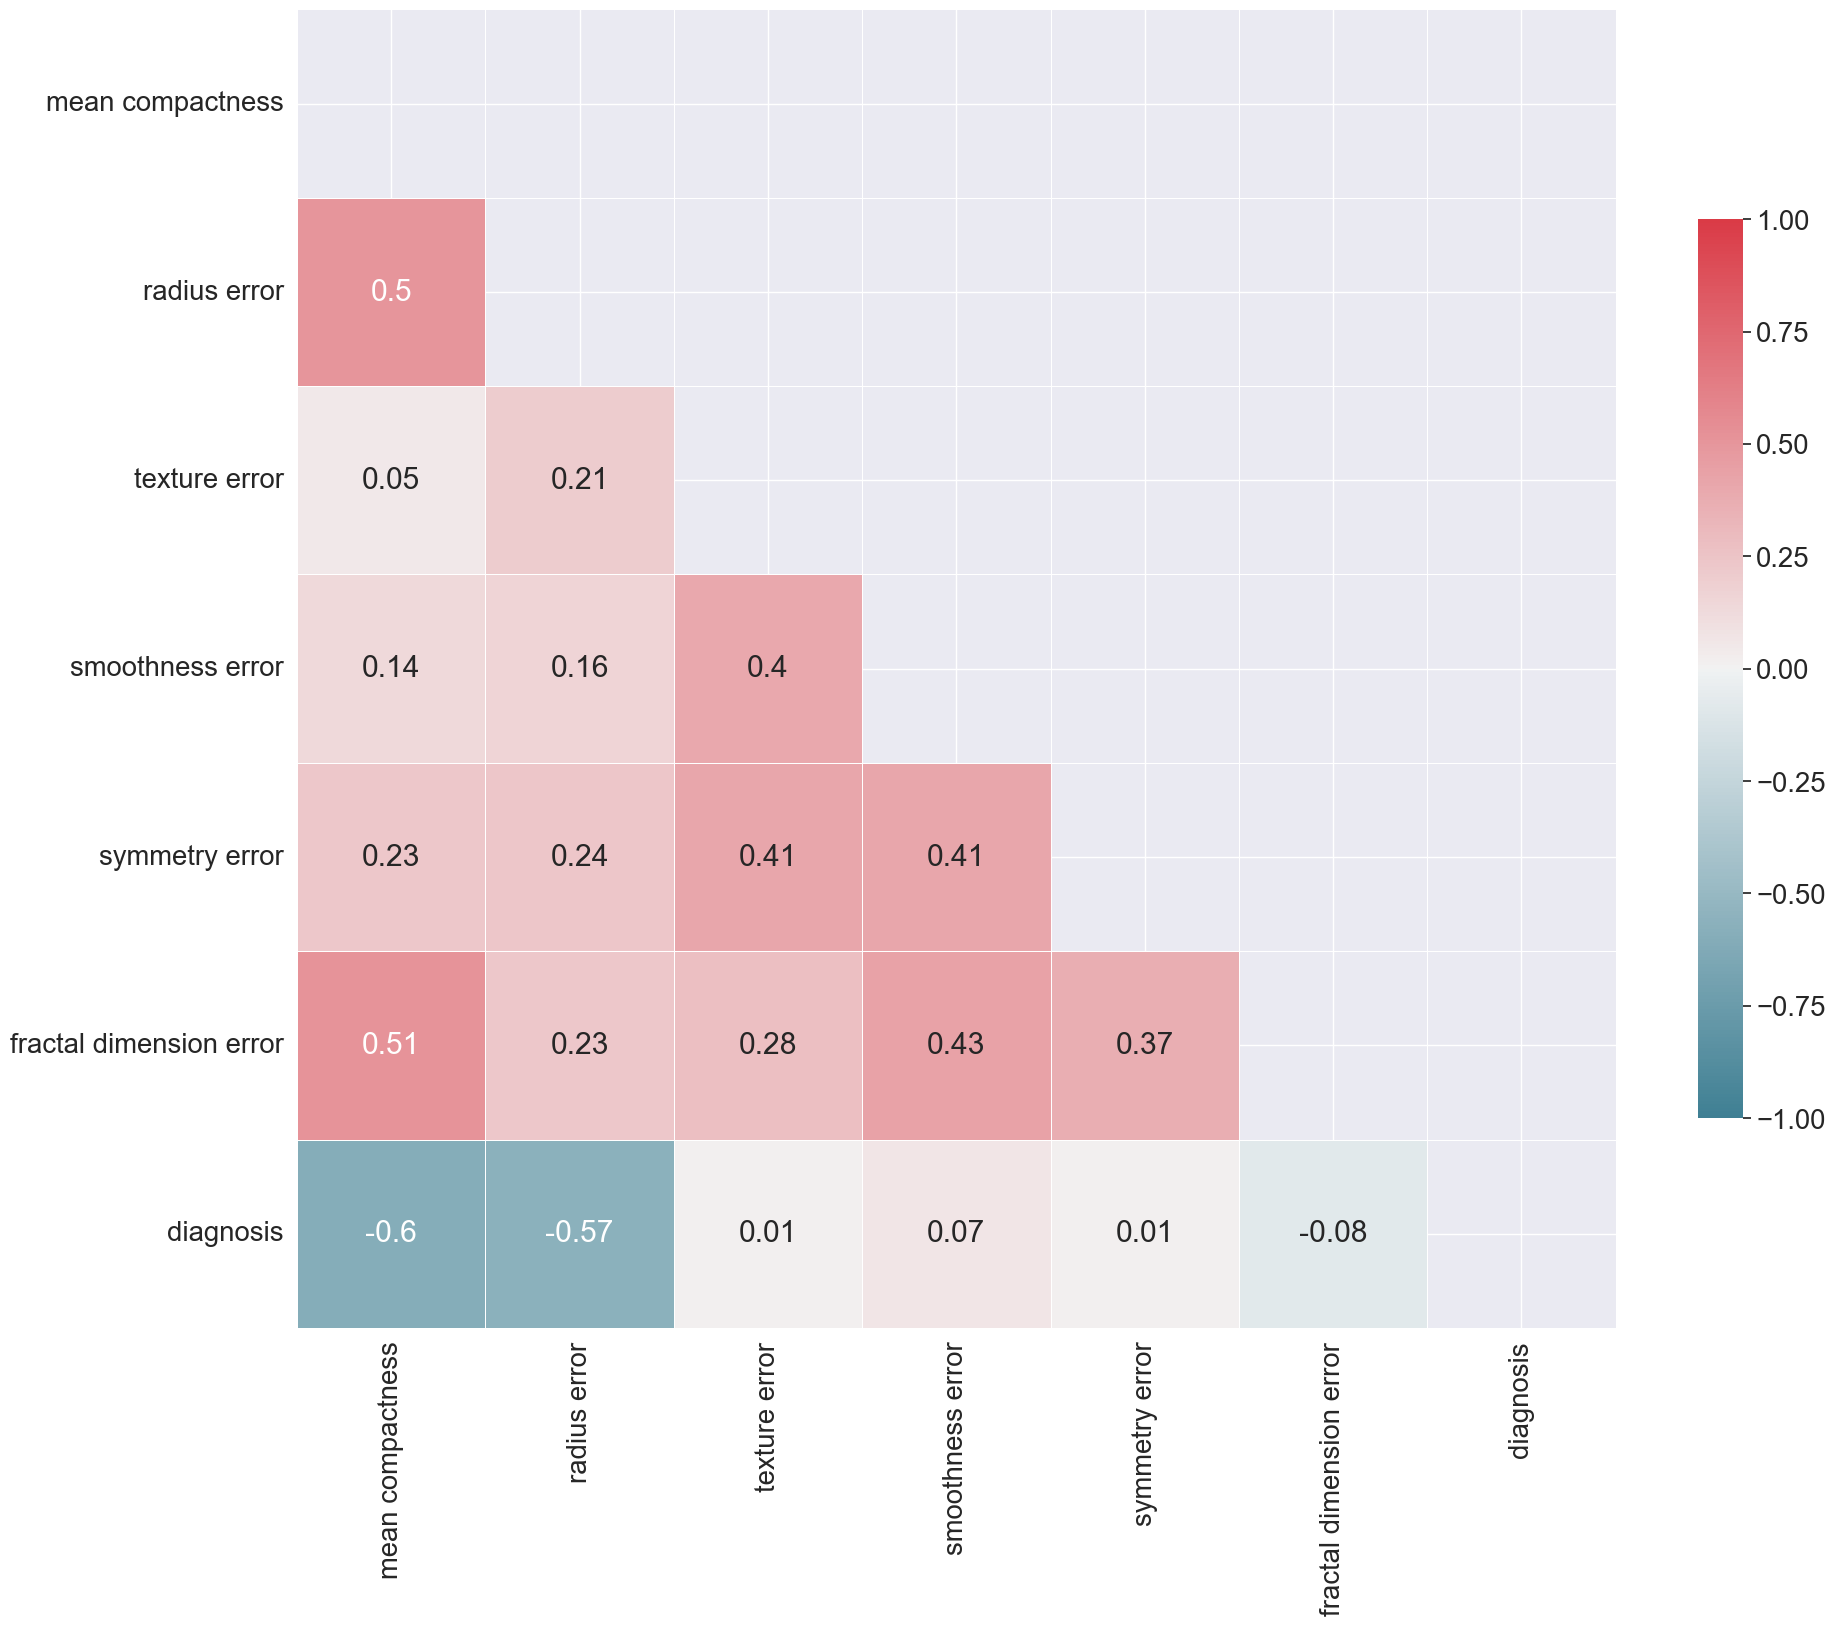

In [102]:
corr = dfsinmulti_after_vif.corr().round(2)

cmap = sns.diverging_palette(220, 10, as_cmap=True)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=1.8)
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5,
            cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

En este análisis específico, se eliminaron **24 variables** que tenían un VIF superior a 10, indicando fuerte multicolinealidad y posible información redundante que podría confundir al modelo. Las variables que pasaron el filtro de VIF y permanecieron incluyen:

- **Texture error**
- **Area error**
- **Smoothness error**
- **Concavity error**
- **Symmetry error**
- **Fractal dimension error**
- **Worst concavity**

Estas se consideran relativamente independientes y cruciales para construir un modelo de regresión robusto y confiable.

**Implicaciones para la Interpretación del Modelo**
- Reducción de la Colinealidad: Eliminar variables con alto VIF mejora la precisión de las estimaciones de los coeficientes y la estabilidad del modelo, facilitando inferencias más seguras sobre la importancia de cada variable.

- Mejora en la Generalización del Modelo: Al evitar el sobreajuste, estas variables hacen que el modelo sea más generalizable a nuevos datos, esencial para diagnósticos futuros de cáncer de mama.

- Interpretación Más Clara: Con menos variables, el modelo es más fácil de entender para médicos y investigadores, ayudando a identificar factores clave en los resultados de las pruebas de cáncer de mama.

- Enfoque en Variables Relevantes: Las variables restantes son vitales para el modelo y pueden señalar direcciones importantes para la investigación y el desarrollo de nuevas estrategias médicas.

#### **Hiperparametrizacion y validacion cruzada:**

##### **Hiperparametrizacion y validacion cruzada usando Gridsearch y pipeline:**

In [41]:
# Separar las características y el objetivo
X = df_after_vif.drop("diagnosis", axis=1)
y = df_after_vif["diagnosis"]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configurar los pasos del pipeline y el modelo de Ridge
steps = [('scaler', StandardScaler()), ('ridge', Ridge())]
pipeline = Pipeline(steps)
parameters = {'ridge__alpha': [0.1, 1, 10, 100, 1000]}

# Definir el objeto GridSearchCV
grid = GridSearchCV(pipeline, parameters, cv=5)
grid.fit(X_train, y_train)

# Mejores parámetros y mejor score
best_params = grid.best_params_
best_score = grid.best_score_
test_score = grid.score(X_test, y_test)

print("Mejores parámetros:", best_params)
print("Mejor score de validación:", best_score)
print("Score en el conjunto de prueba:", test_score)

Mejores parámetros: {'ridge__alpha': 10}
Mejor score de validación: 0.45799143306343437
Score en el conjunto de prueba: 0.6284149019613763


##### **Hiperparametrizacion y validacion cruzada sin usar Gridsearch y pipeline:**

In [44]:
# Configuración inicial
alphas = [0.1, 1, 10, 100, 1000]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_alpha_manual = None
best_score_manual = -float('inf')
scores_manual = []

# Escalado de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Validación cruzada manual
for alpha in alphas:
    model_scores = []
    for train_index, val_index in kf.split(X_train_scaled):
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        model = Ridge(alpha=alpha)
        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)
        score = r2_score(y_val_fold, y_pred)
        model_scores.append(score)
    avg_score = np.mean(model_scores)
    scores_manual.append(avg_score)
    if avg_score > best_score_manual:
        best_score_manual = avg_score
        best_alpha_manual = alpha

# Evaluación del mejor modelo en el conjunto de prueba
final_model_manual = Ridge(alpha=best_alpha_manual)
final_model_manual.fit(X_train_scaled, y_train)
manual_test_score = final_model_manual.score(X_test_scaled, y_test)

# Outputs
print("Mejor alpha manual:", best_alpha_manual)
print("Mejor score de validación manual:", best_score_manual)
print("Score de prueba manual:", manual_test_score)

Mejor alpha manual: 10
Mejor score de validación manual: 0.5475960716459294
Score de prueba manual: 0.6284149019613763


##### **Comparacion:**

In [45]:
# Datos de los resultados del proceso manual
data_manual_breast_cancer = {
    "Método": "Manual",
    "Mejor Alpha": [best_alpha_manual],
    "Mejor Score de Validación (R²)": [best_score_manual],
    "Score en Test (R²)": [manual_test_score],
    "Scores de Validación por Alpha": [scores_manual]
}

# Datos de los resultados del proceso con GridSearchCV y Pipeline
data_gridsearch_breast_cancer = {
    "Método": "GridSearchCV y Pipeline",
    "Mejor Alpha": [grid.best_params_['ridge__alpha']],
    "Mejor Score de Validación (R²)": [grid.best_score_],
    "Score en Test (R²)": [grid.score(X_test, y_test)],
    "Scores de Validación por Alpha": ["No Disponible"]
}

# Crear y combinar DataFrames para una tabla comparativa
df_manual_breast_cancer = pd.DataFrame(data_manual_breast_cancer)
df_gridsearch_breast_cancer = pd.DataFrame(data_gridsearch_breast_cancer)
comparison_table_breast_cancer = pd.concat([df_manual_breast_cancer, df_gridsearch_breast_cancer])
comparison_table_breast_cancer.set_index("Método", inplace=True)

comparison_table_breast_cancer

Mejor Alpha  Mejor Score de Validación (R²)  \
Método                                                                 
Manual                            10                        0.547596   
GridSearchCV y Pipeline           10                        0.457991   

                         Score en Test (R²)  \
Método                                        
Manual                             0.628415   
GridSearchCV y Pipeline            0.628415   

                                            Scores de Validación por Alpha  
Método                                                                      
Manual                   [0.5408958186987127, 0.5418323111293186, 0.547...  
GridSearchCV y Pipeline                                      No Disponible

##### **Interpretacion:**

Ambos métodos seleccionaron un alpha de 10 como óptimo, lo que indica que un nivel de regularización medio es adecuado para este conjunto de datos, balanceando bien entre el sesgo y la varianza. El **'Mejor Score de Validación (R²)'** fue significativamente más alto en el método manual (**0.548** aproximadamente) en comparación con el método de GridSearchCV y Pipeline (aproximadamente **0.458**). Esto sugiere que el ajuste manual pudo haber capturado mejor las sutilezas del conjunto de datos durante la fase de validación, posiblemente debido a un manejo más detallado y personalizado de la validación cruzada.

**Score en Test:**
El aspecto más destacable es que, a pesar de las diferencias en la validación, ambos métodos lograron un **Score en Test (R²) idéntico de aproximadamente 0.628.** Esto es particularmente relevante porque demuestra que, independientemente de los métodos de optimización y validación utilizados, ambos enfoques fueron capaces de generalizar de manera muy similar y efectiva a nuevos datos.

#### **Comparacion de Knn con Regresion logistica:**

##### **Modelos:**

In [103]:
knn = KNeighborsClassifier()
log_reg = LogisticRegression(max_iter=10000)

##### **Entrenamiento:**

In [104]:
X = dfsinmulti_after_vif.drop("diagnosis", axis=1)  # Asegúrate de reemplazar "variable_objetivo" con el nombre de tu columna objetivo
y = dfsinmulti_after_vif["diagnosis"]  # Reemplaza "variable_objetivo" con el nombre de tu columna objetivo

# División de los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
knn.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

##### **Predicciones:**

In [106]:
knn_preds = knn.predict(X_test)
log_reg_preds = log_reg.predict(X_test)

##### **Metricas:**

In [107]:
metrics = {
    'K-NN': {
        'precision': precision_score(y_test, knn_preds),
        'recall': recall_score(y_test, knn_preds),
        'f1-score': f1_score(y_test, knn_preds),
        'AUC': roc_auc_score(y_test, knn_preds)
    },
    'Logistic Regression': {
        'precision': precision_score(y_test, log_reg_preds),
        'recall': recall_score(y_test, log_reg_preds),
        'f1-score': f1_score(y_test, log_reg_preds),
        'AUC': roc_auc_score(y_test, log_reg_preds)
    }
}

##### **Tabla comparativa:**

In [108]:
dfComparacion = pd.DataFrame(metrics).transpose()
dfComparacion

precision    recall  f1-score       AUC
K-NN                  0.818182  0.887324  0.851351  0.780871
Logistic Regression   0.850000  0.957746  0.900662  0.839338

El **recall** para *K-NN* es de aproximadamente 0.887, lo que significa que este modelo es capaz de identificar correctamente alrededor del 88.7% de los casos de cáncer maligno en el conjunto de datos. Por otro lado, para la *regresión logística*, el **recall** es aún mayor, aproximadamente 0.958, lo que indica que este modelo puede identificar correctamente alrededor del 95.8% de los casos malignos.

Como **conclusion** teniendo en cuenta lo anterior el recall se centra en la capacidad del modelo para identificar verdaderos positivos, y en el contexto médico es crucial minimizar los falsos negativos (casos de cáncer maligno que se clasifican como benignos), una alta tasa de recall es deseable. En este caso, la regresión logística supera a K-NN en términos de recall, lo que sugiere que la regresión logística podría ser una mejor opción si el objetivo es maximizar la detección de casos de cáncer maligno.

### **Boston Housing: (LinearRegression, Ridge, Lasso):**

#### **Importacion de datos:**

In [4]:
X, y = mglearn.datasets.load_extended_boston()
df_features = pd.DataFrame(X, columns=["feature_" + str(i) for i in range(X.shape[1])])
df_features["target"] = y
df_ftrcopy = df_features.copy()
df_features.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.000000       0.18   0.067815        0.0   0.314815   0.577505   
1   0.000236       0.00   0.242302        0.0   0.172840   0.547998   
2   0.000236       0.00   0.242302        0.0   0.172840   0.694386   
3   0.000293       0.00   0.063050        0.0   0.150206   0.658555   
4   0.000705       0.00   0.063050        0.0   0.150206   0.687105   

   feature_6  feature_7  feature_8  feature_9  ...  feature_95  feature_96  \
0   0.641607   0.269203   0.000000   0.208015  ...    0.059749    0.208015   
1   0.782698   0.348962   0.043478   0.104962  ...    0.058064    0.104962   
2   0.599382   0.348962   0.043478   0.104962  ...    0.058064    0.103885   
3   0.441813   0.448545   0.086957   0.066794  ...    0.043345    0.066412   
4   0.528321   0.448545   0.086957   0.066794  ...    0.043345    0.066794   

   feature_97  feature_98  feature_99  feature_100  feature_101  feature_102  \
0    0.018655    0.082503    0.287234     0.025759     1.000000     0.089680   
1    0.021462    0.306021    0.553191     0.113111     1.000000     0.204470   
2    0.006661    0.306021    0.547514     0.035109     0.979580     0.062814   
3    0.002230    0.421118    0.645222     0.021667     0.988585     0.033197   
4    0.006635    0.421118    0.648936     0.064464     1.000000     0.099338   

   feature_103  target  
0     0.008042    24.0  
1     0.041808    21.6  
2     0.004028    34.7  
3     0.001115    33.4  
4     0.009868    36.2  

[5 rows x 105 columns]

#### **Estrutura de los datos:**

##### **Info:**

In [5]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Columns: 105 entries, feature_0 to target
dtypes: float64(105)
memory usage: 415.2 KB


##### **Tamaño:**

In [6]:
df_features.shape

(506, 105)

##### **Conteo de nulos:**

In [7]:
null_counts = df_features.isnull().sum()
print(null_counts)

feature_0      0
feature_1      0
feature_2      0
feature_3      0
feature_4      0
              ..
feature_100    0
feature_101    0
feature_102    0
feature_103    0
target         0
Length: 105, dtype: int64


##### **Variables:**

In [8]:
colnn = df_features.columns
print(colnn)

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       ...
       'feature_95', 'feature_96', 'feature_97', 'feature_98', 'feature_99',
       'feature_100', 'feature_101', 'feature_102', 'feature_103', 'target'],
      dtype='object', length=105)


Este dataset incluye un total de 506 observaciones y 105 características, según la información proporcionada. Este es un análisis extendido del conocido conjunto de datos de viviendas de Boston, que originalmente incluía menos características. Las características adicionales en esta versión extendida pueden incluir interacciones polinómicas y otras transformaciones de las variables originales, lo que permite un análisis más detallado y potencialmente más insights sobre los factores que afectan los precios de las viviendas en la región de Boston.

**Detalles del Dataset**
**Dimensiones**
- Total de observaciones (filas): 506
- Total de características (columnas): 105
Este tamaño de dataset es manejable pero ofrece suficiente complejidad y riqueza de datos para permitir modelos predictivos robustos y detallados.

**Valores Nulos**
Una revisión inicial de los valores nulos muestra que no hay valores faltantes en ninguna de las variables (feature_0 a feature_103 y target). Esto es ideal para el análisis de datos, ya que simplifica la preparación de datos al eliminar la necesidad de técnicas de imputación o eliminación de filas/columnas con datos faltantes:

**Valores nulos por variable:** 0
La ausencia de valores nulos indica que el dataset está completo y listo para ser utilizado en análisis estadísticos y modelado sin necesidad de procesos adicionales para tratar con datos incompletos.

**Nomenclatura de Variables**
Las variables explicativas están numeradas y prefijadas con "feature_", e.g., feature_0, feature_1, ..., feature_103. La variable dependiente o target se llama "target", que representa probablemente el precio de las viviendas.

**Variables explicativas: feature_0 a feature_103**
**Variable dependiente (objetivo): target**

#### **EDA:**

##### **Descripcion de los datos:**

In [9]:
df_features.describe()

feature_0   feature_1   feature_2   feature_3   feature_4   feature_5  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     0.040544    0.113636    0.391378    0.069170    0.349167    0.521869   
std      0.096679    0.233225    0.251479    0.253994    0.238431    0.134627   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000851    0.000000    0.173387    0.000000    0.131687    0.445392   
50%      0.002812    0.000000    0.338343    0.000000    0.314815    0.507281   
75%      0.041258    0.125000    0.646628    0.000000    0.491770    0.586798   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        feature_6   feature_7   feature_8   feature_9  ...  feature_95  \
count  506.000000  506.000000  506.000000  506.000000  ...  506.000000   
mean     0.676364    0.242381    0.371713    0.422208  ...    0.297077   
std      0.289896    0.191482    0.378576    0.321636  ...    0.284685   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.433831    0.088259    0.130435    0.175573  ...    0.087624   
50%      0.768280    0.188949    0.173913    0.272901  ...    0.142115   
75%      0.938980    0.369088    1.000000    0.914122  ...    0.739077   
max      1.000000    1.000000    1.000000    1.000000  ...    0.797872   

       feature_96  feature_97  feature_98  feature_99  feature_100  \
count  506.000000  506.000000  506.000000  506.000000   506.000000   
mean     0.346735    0.161667    0.440980    0.550358     0.204698   
std      0.283915    0.194503    0.250593    0.252126     0.168367   
min      0.000000    0.000000    0.000000    0.000000     0.000000   
25%      0.158244    0.026190    0.260751    0.399728     0.071486   
50%      0.225410    0.065424    0.470858    0.615559     0.155388   
75%      0.440063    0.256045    0.653689    0.758547     0.311613   
max      1.000000    0.914122    1.000000    0.964446     0.825020   

       feature_101  feature_102  feature_103      target  
count   506.000000   506.000000   506.000000  506.000000  
mean      0.860314     0.254263     0.129599   22.532806  
std       0.265606     0.178510     0.161755    9.197104  
min       0.000000     0.000000     0.000000    5.000000  
25%       0.894405     0.117439     0.020748   17.025000  
50%       0.972654     0.219227     0.070612   21.200000  
75%       0.996599     0.344749     0.176497   25.000000  
max       1.000000     1.000000     1.000000   50.000000  

[8 rows x 105 columns]

##### **Histogramas:**

array([[<Axes: title={'center': 'feature_1'}>,
        <Axes: title={'center': 'feature_2'}>,
        <Axes: title={'center': 'feature_3'}>,
        <Axes: title={'center': 'feature_4'}>,
        <Axes: title={'center': 'feature_5'}>,
        <Axes: title={'center': 'feature_6'}>,
        <Axes: title={'center': 'feature_7'}>,
        <Axes: title={'center': 'feature_8'}>,
        <Axes: title={'center': 'feature_9'}>,
        <Axes: title={'center': 'feature_10'}>],
       [<Axes: title={'center': 'feature_11'}>,
        <Axes: title={'center': 'feature_12'}>,
        <Axes: title={'center': 'feature_13'}>,
        <Axes: title={'center': 'feature_14'}>,
        <Axes: title={'center': 'feature_15'}>,
        <Axes: title={'center': 'feature_16'}>,
        <Axes: title={'center': 'feature_17'}>,
        <Axes: title={'center': 'feature_18'}>,
        <Axes: title={'center': 'feature_19'}>,
        <Axes: title={'center': 'feature_20'}>],
       [<Axes: title={'center': 'feature_21'}>,

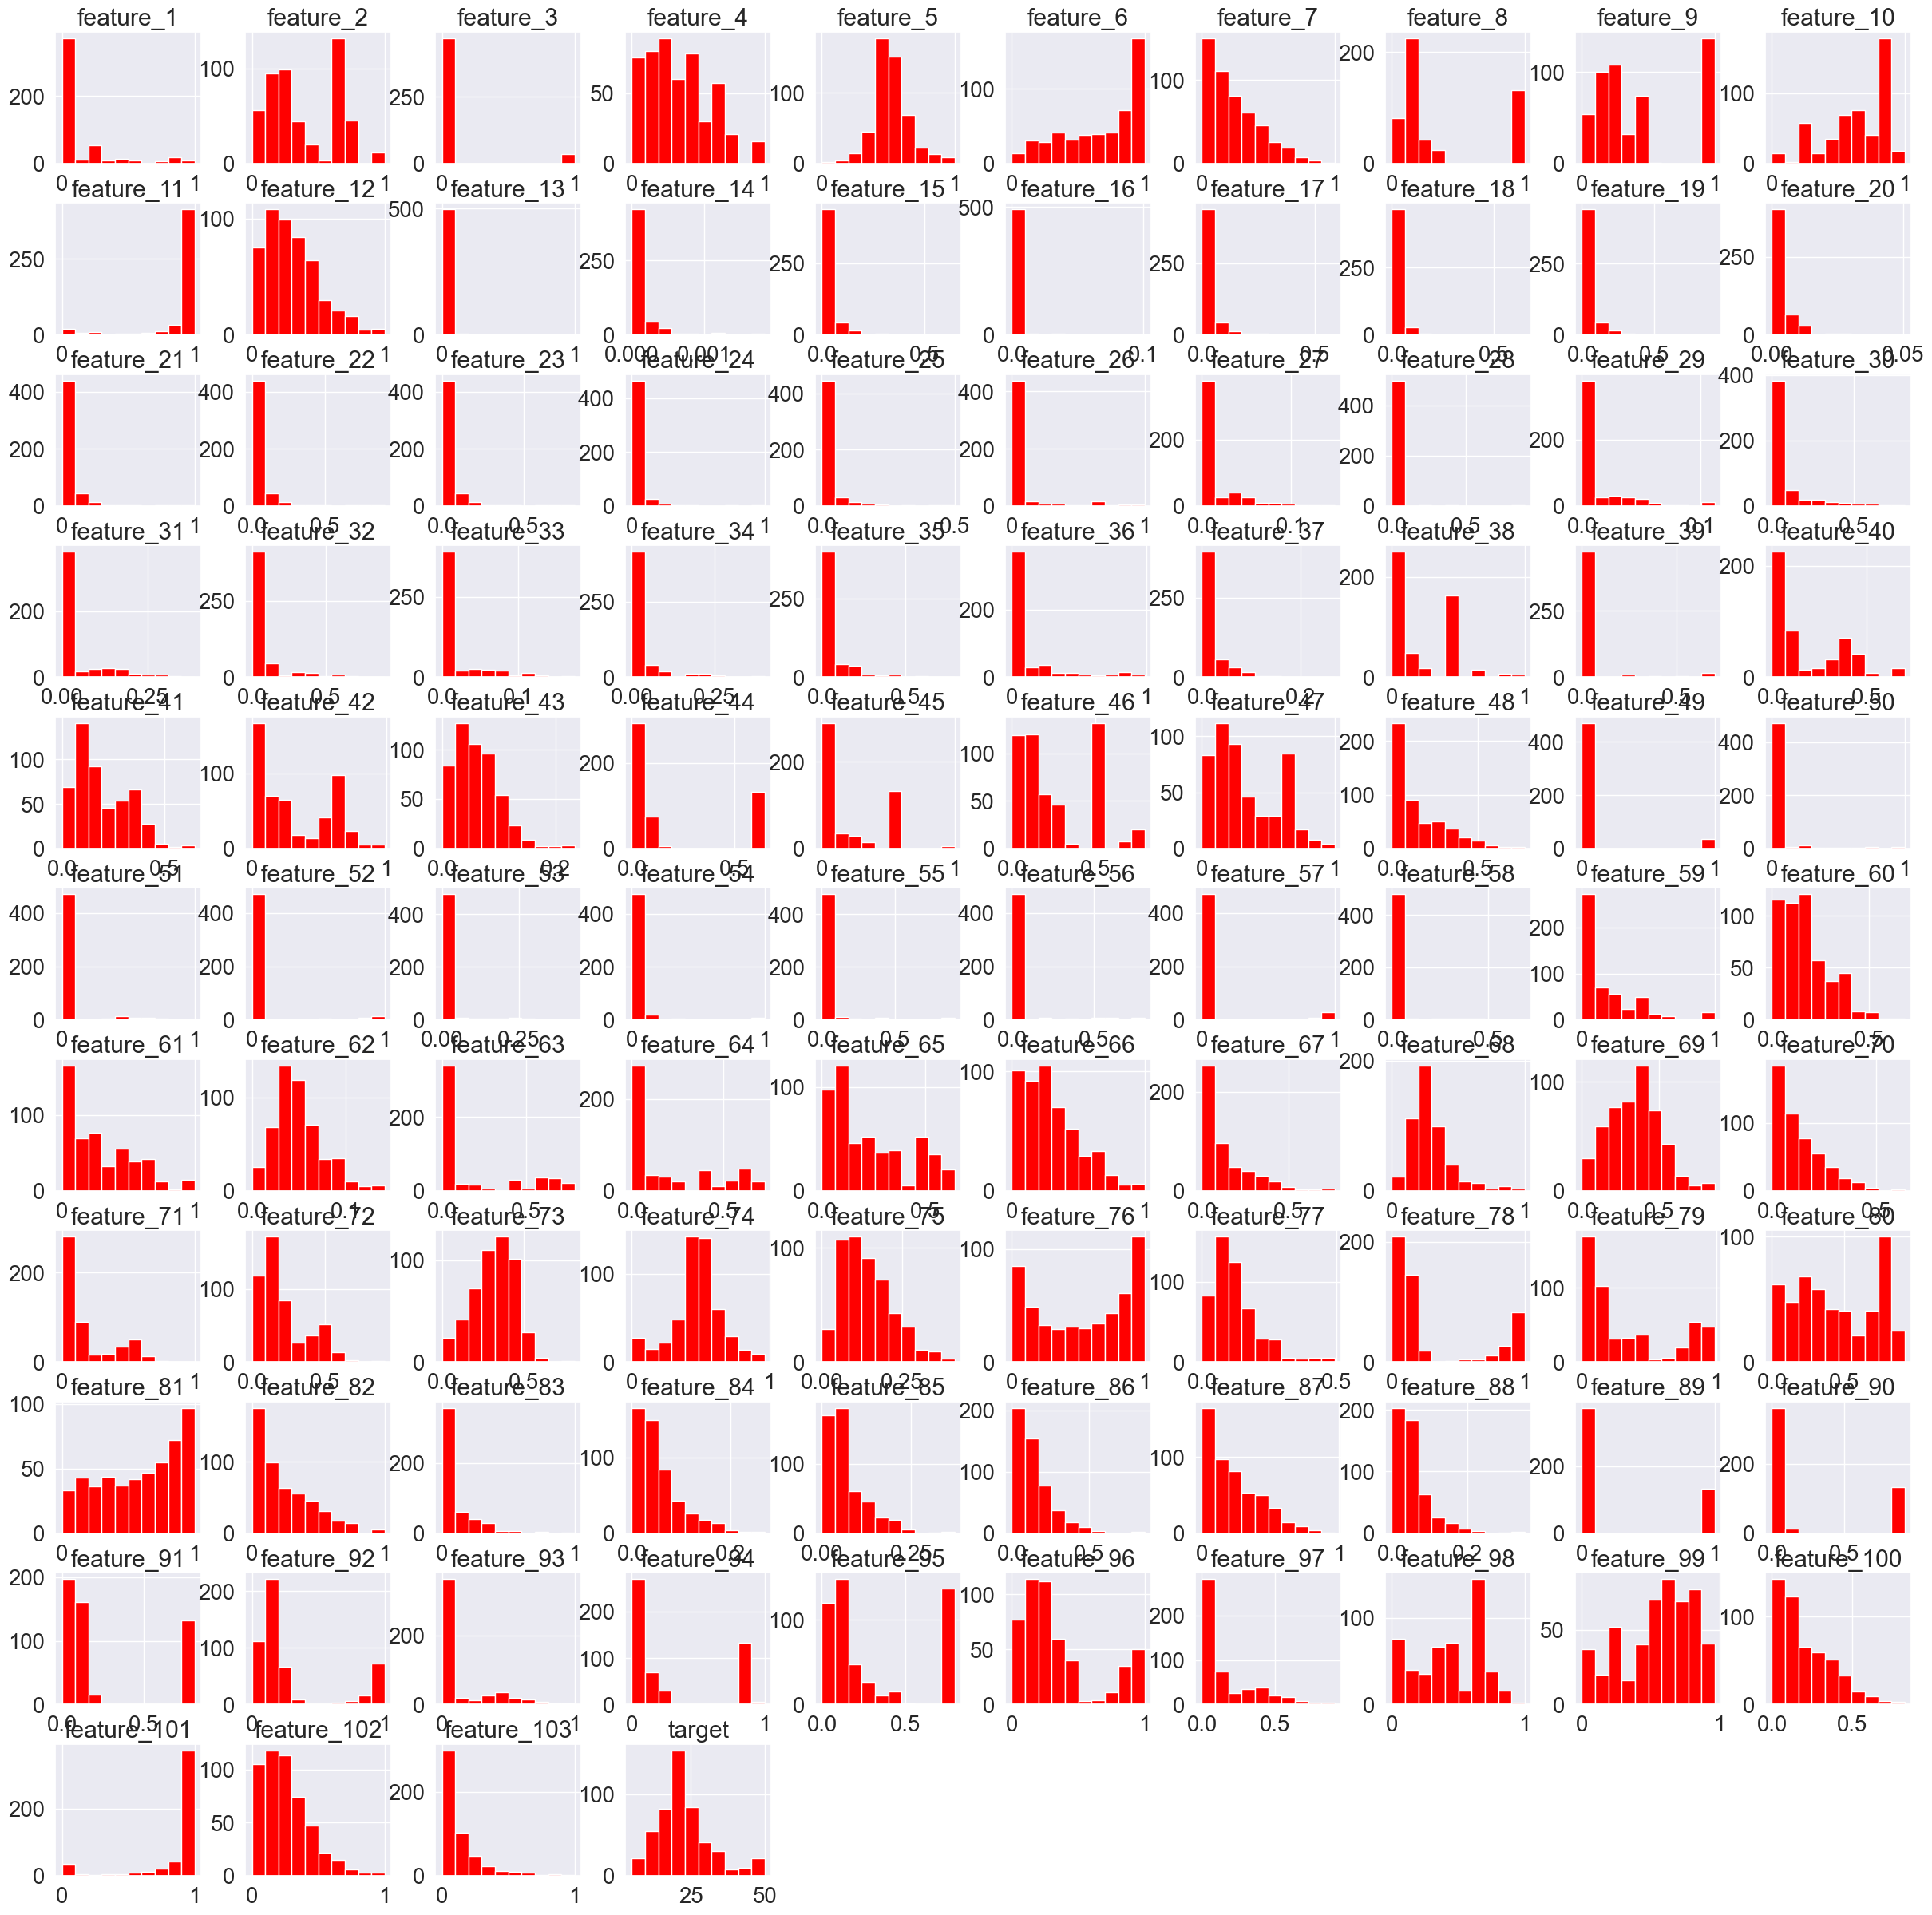

In [11]:
sns.set(font_scale=1.8)
df_features.iloc[:, 1:].hist(figsize=(30, 30), color="red")

##### **Boxplot:**

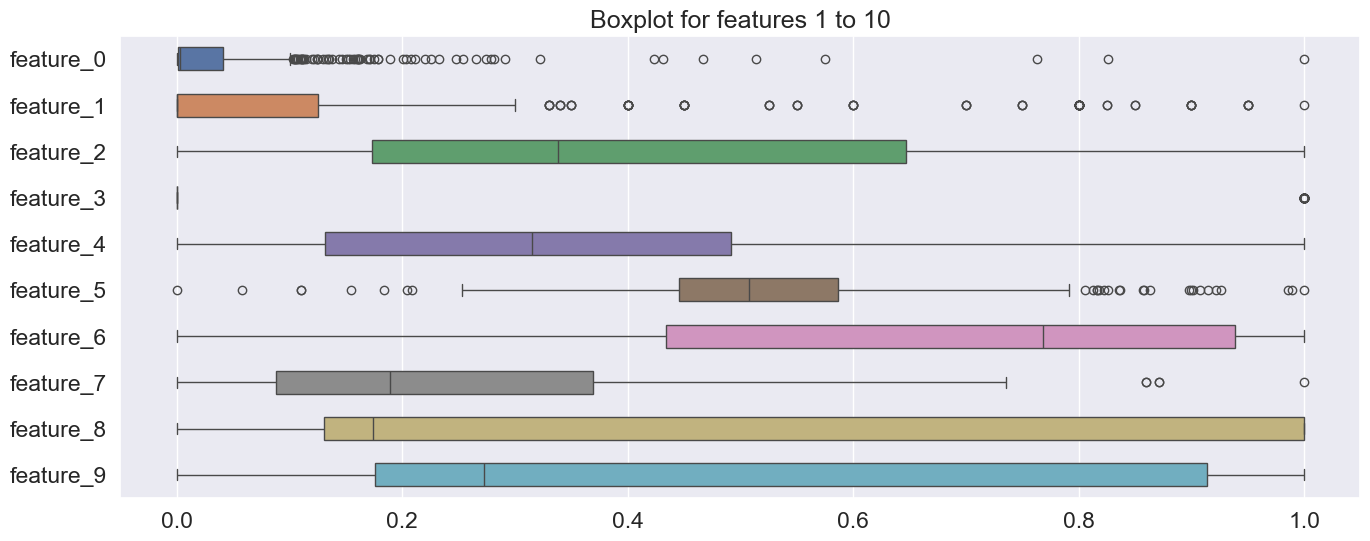

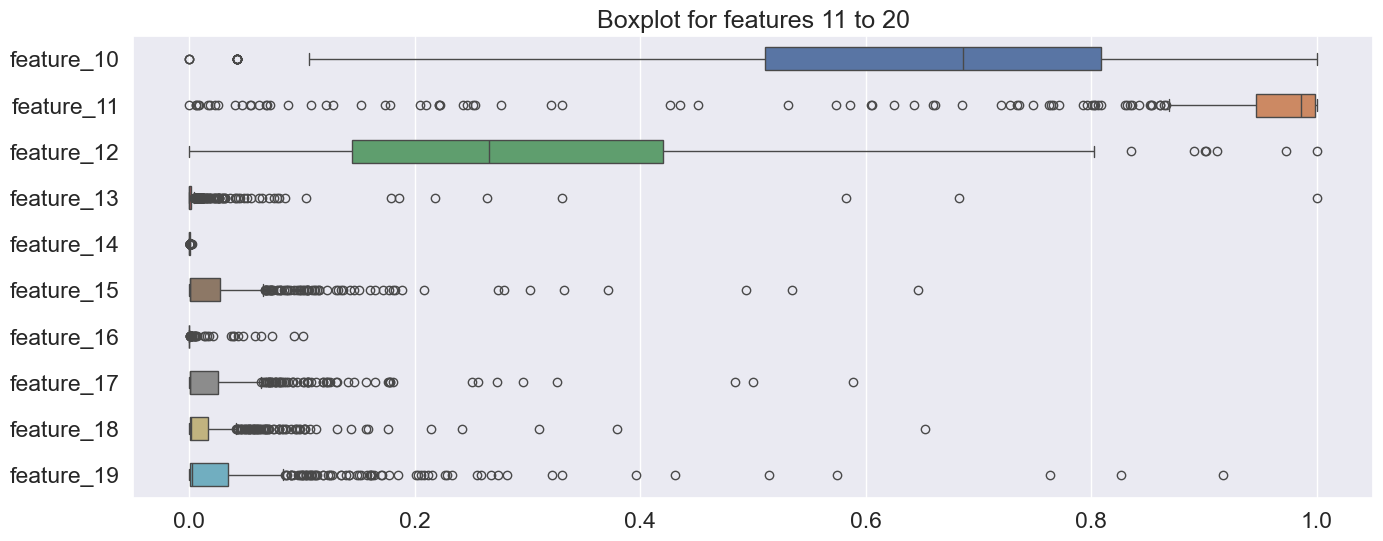

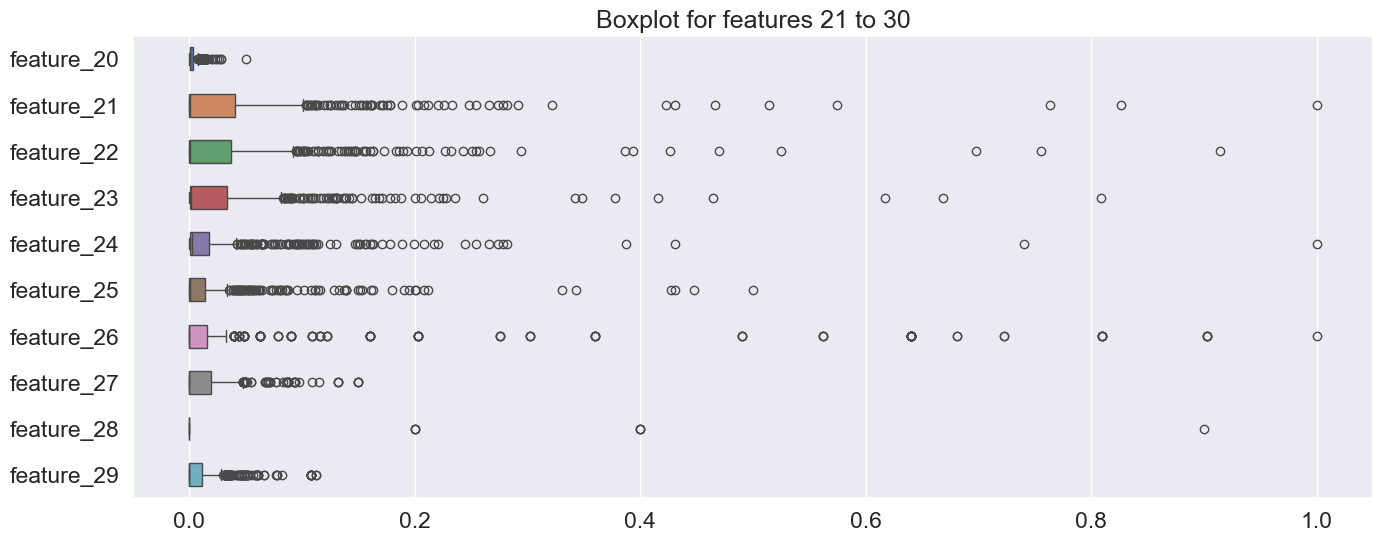

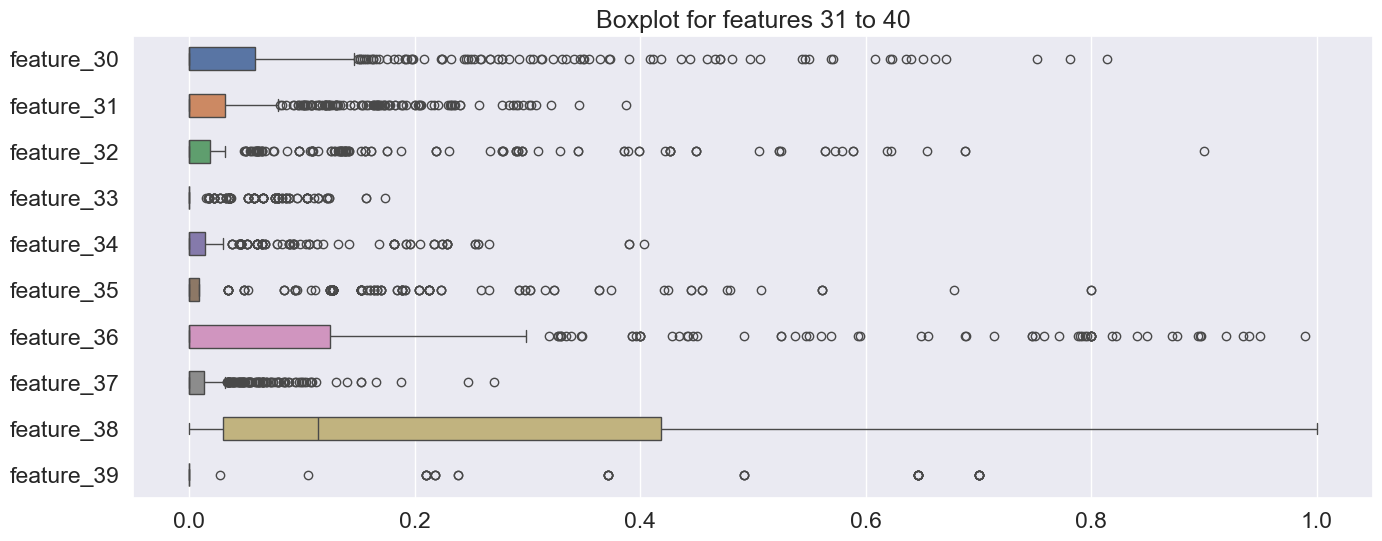

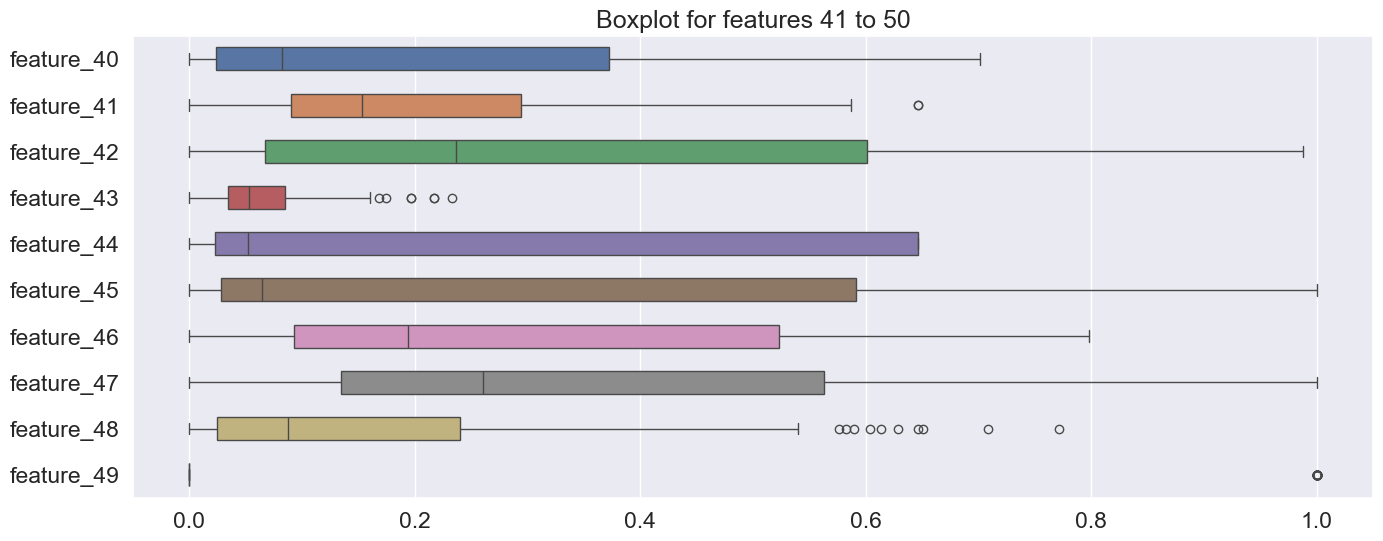

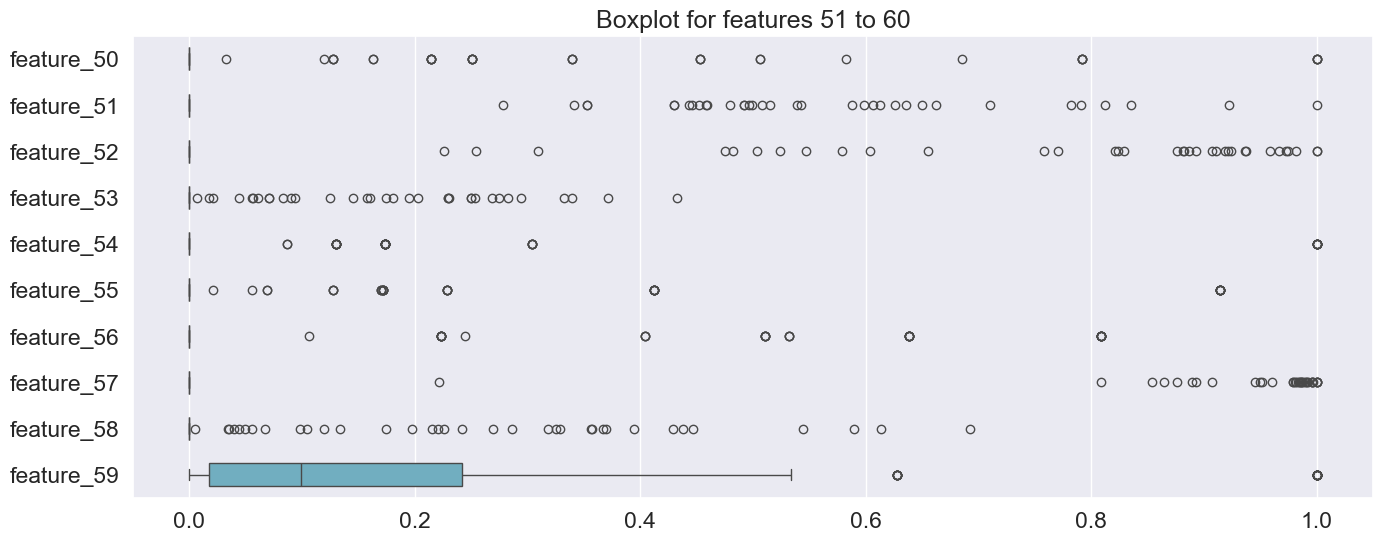

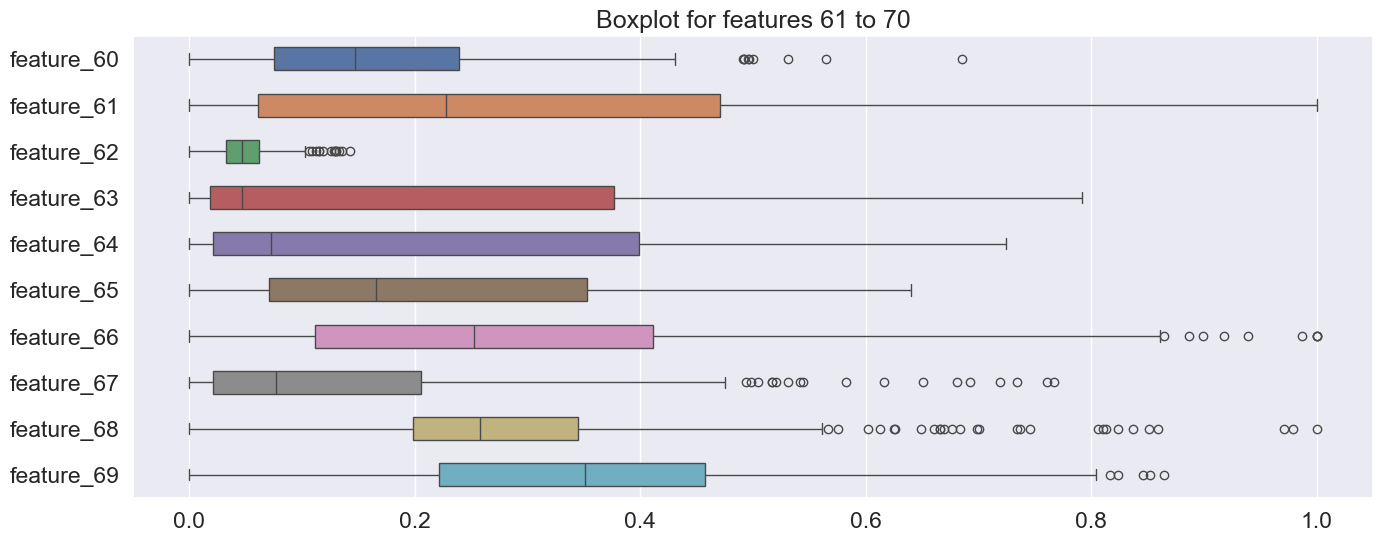

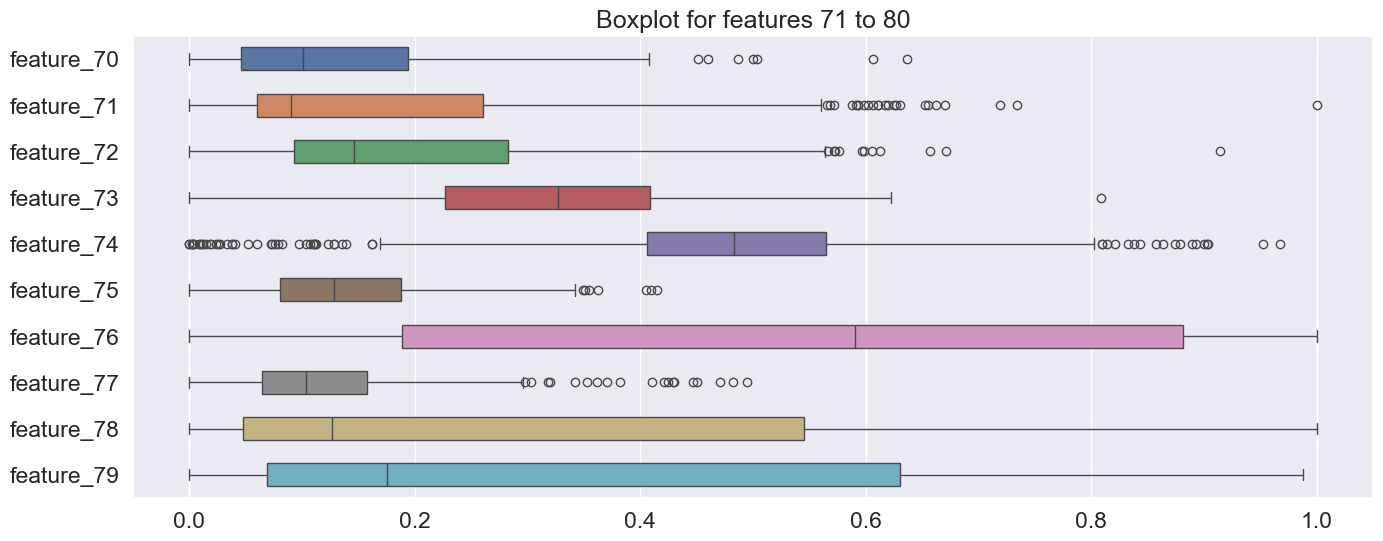

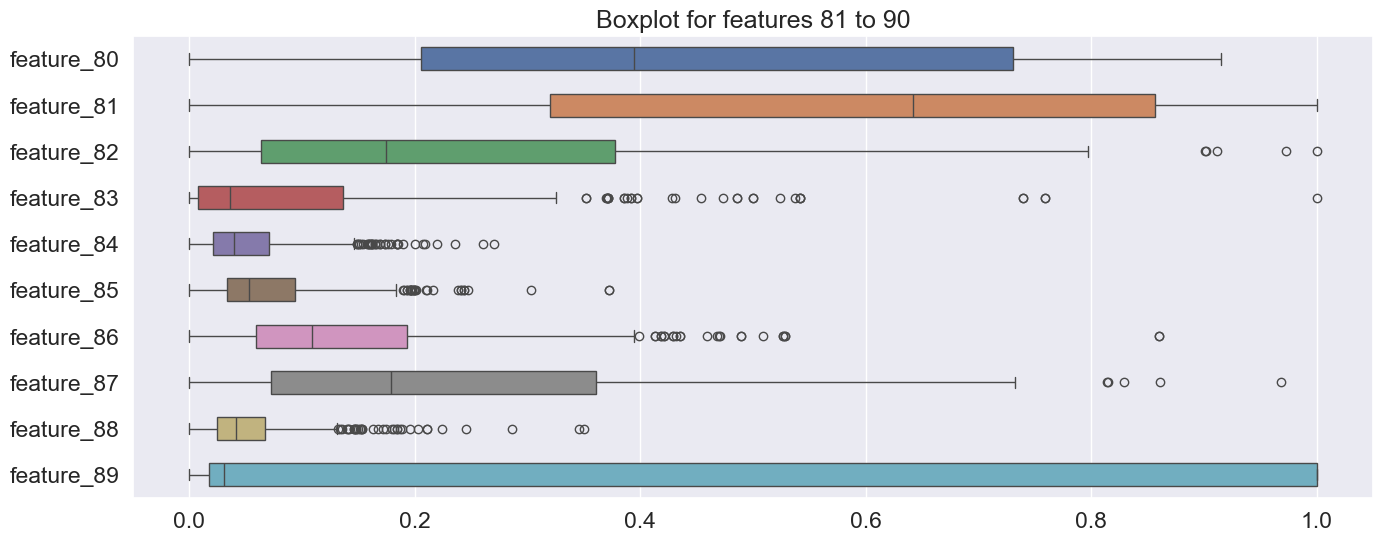

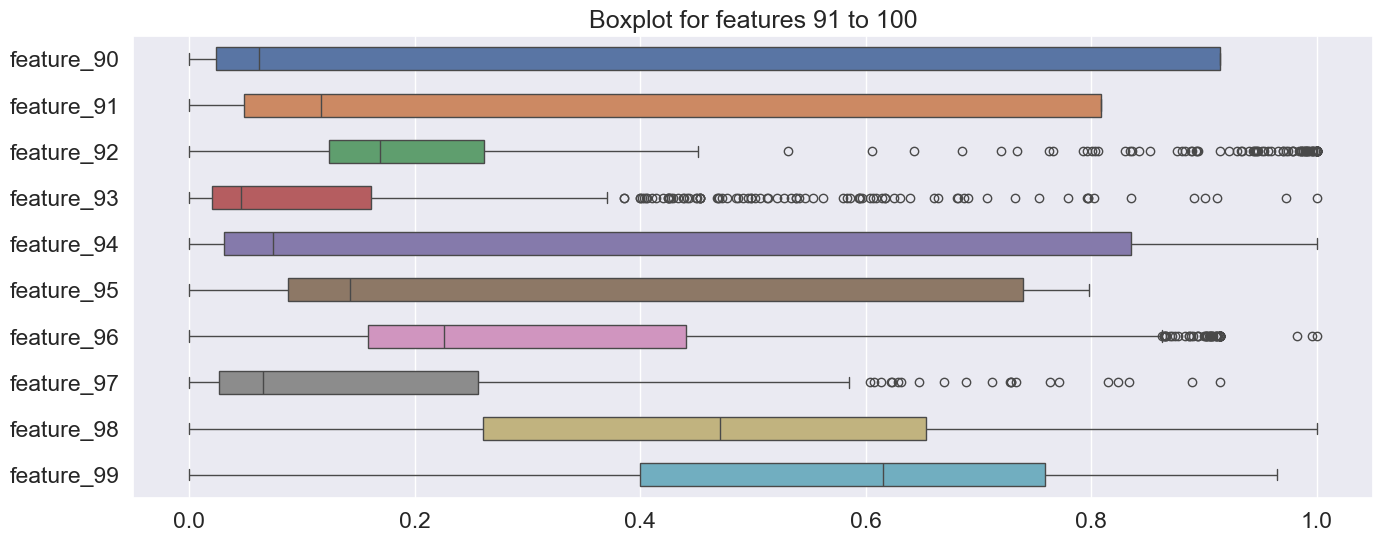

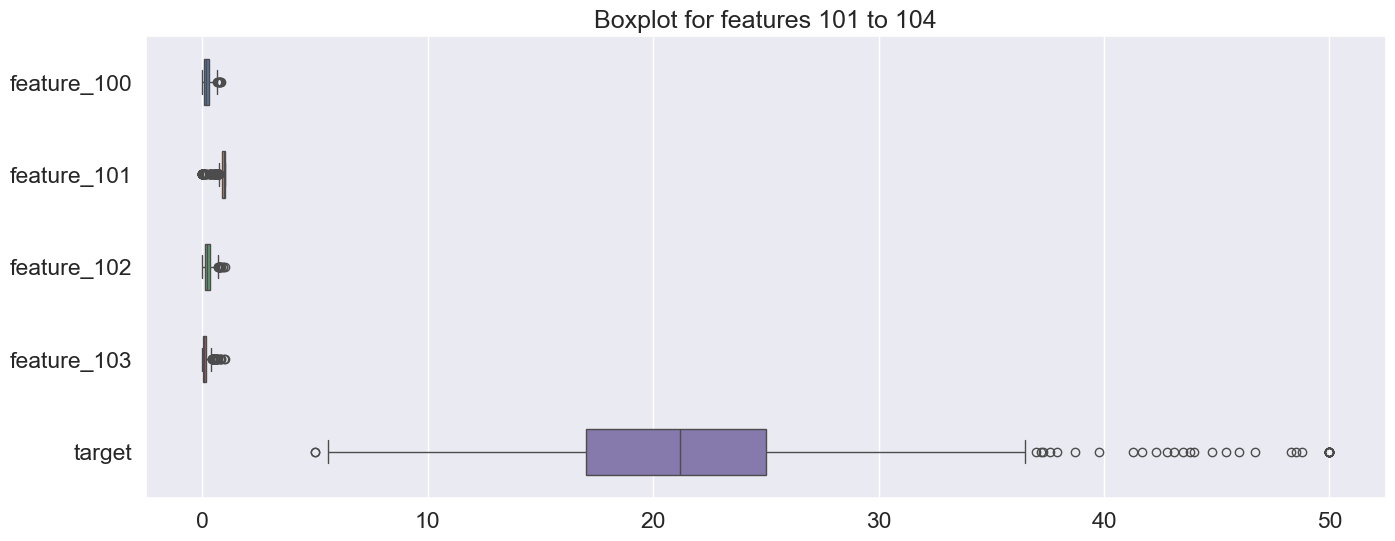

In [12]:
sns.set(font_scale=1.5)

vars_per_plot = 10

total_vars = df_features.shape[1] - 1

for i in range(0, total_vars, vars_per_plot):
    plt.figure(figsize=(16, 6))  # Configura el tamaño de la figura
    sns.boxplot(
        data=df_features.iloc[:, i : i + vars_per_plot],
        width=0.5,
        saturation=0.75,
        orient="h",
    )
    plt.title(
        f"Boxplot for features {i+1} to {min(i+vars_per_plot, total_vars)}"
    )  # Título dinámico basado en el número de característica
    plt.show()

#### **Hiperparametrizacion y validacion cruzada:**

##### **hiperparametrizacion y validacion cruzada usando Gridsearch y pipeline:**

In [27]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Definir un objeto de puntuación utilizando el coeficiente de determinación R^2
scorer = make_scorer(r2_score)

# Configurar los pasos del pipeline
steps = [
    ("scaler", StandardScaler()),  # Escalador para normalizar los datos
    ("ridge", Ridge()),  # Modelo Ridge para regresión
]

# Crear el pipeline
pipeline = Pipeline(steps)

# Definir el grid de parámetros a buscar
param_grid = {
    "ridge__alpha": [0.1, 1, 10, 100, 1000]  # Valores de alpha para probar en Ridge
}

# Configurar GridSearchCV
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring=scorer)

# Ajustar GridSearchCV a los datos de entrenamiento
grid.fit(X_train, y_train)

# Obtener el mejor modelo y parámetros
best_model = grid.best_estimator_
best_score = grid.best_score_
best_params = grid.best_params_

# Evaluar el modelo en el conjunto de prueba
test_score = best_model.score(X_test, y_test)

print("Mejor Modelo:", best_model)
print("Mejor Score de Validación (R^2):", best_score)
print("Mejores Parámetros:", best_params)
print("Score en el Conjunto de Prueba (R^2):", test_score)

Mejor Modelo: Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge(alpha=1))])
Mejor Score de Validación (R^2): 0.8548157940131356
Mejores Parámetros: {'ridge__alpha': 1}
Score en el Conjunto de Prueba (R^2): 0.8324956802662223


##### **hiperparametrizacioin y validacion cruzada sin usar Gridsearch y pipeline:**

In [28]:
# Initialize parameters for manual cross-validation
alphas_manual = [0.1, 1, 10, 100, 1000]
k_fold_manual = KFold(n_splits=5, random_state=42, shuffle=True)
best_score_manual = -np.inf
best_alpha_manual = None
scores_manual = []

# Scale features (important when using Ridge Regression)
scaler_manual = StandardScaler()
X_train_scaled_manual = scaler_manual.fit_transform(X_train)
X_test_scaled_manual = scaler_manual.transform(X_test)

# Perform cross-validation manually
for alpha in alphas_manual:
    fold_scores_manual = []

    for train_index, val_index in k_fold_manual.split(X_train_scaled_manual):
        # Split data into training and validation
        X_train_fold_manual, X_val_fold_manual = (
            X_train_scaled_manual[train_index],
            X_train_scaled_manual[val_index],
        )
        y_train_fold_manual, y_val_fold_manual = (
            y_train[train_index],
            y_train[val_index],
        )

        # Initialize and train the Ridge Regression model
        model_manual = Ridge(alpha=alpha)
        model_manual.fit(X_train_fold_manual, y_train_fold_manual)

        # Predict and evaluate using the validation set
        y_pred_manual = model_manual.predict(X_val_fold_manual)
        score_manual = r2_score(y_val_fold_manual, y_pred_manual)
        fold_scores_manual.append(score_manual)

    # Average scores across all folds
    average_score_manual = np.mean(fold_scores_manual)
    scores_manual.append(average_score_manual)

    # Update the best score and best alpha if the current model is better
    if average_score_manual > best_score_manual:
        best_score_manual = average_score_manual
        best_alpha_manual = alpha

# Train a final model on the full training set with the best alpha
final_model_manual = Ridge(alpha=best_alpha_manual)
final_model_manual.fit(X_train_scaled_manual, y_train)
test_score_manual = final_model_manual.score(X_test_scaled_manual, y_test)

print("Best Alpha:", best_alpha_manual)
print("Best Validation Score (R^2):", best_score_manual)
print("Test Score (R^2):", test_score_manual)
print("Validation Scores for Each Alpha:", scores_manual)

Best Alpha: 1
Best Validation Score (R^2): 0.8246958868541139
Test Score (R^2): 0.8324956802662223
Validation Scores for Each Alpha: [0.7722746781055977, 0.8246958868541139, 0.8102794619765008, 0.7681720357897956, 0.6758475203810813]


##### **Comparacion:**

In [31]:
# Datos de los resultados del proceso manual
data_manual = {
    "Método": "Manual",
    "Mejor Alpha": [best_alpha_manual],
    "Mejor Score de Validación (R²)": [best_score_manual],
    "Score en Test (R²)": [test_score_manual],
    "Scores de Validación por Alpha": [scores_manual],
}

# Datos de los resultados del proceso con GridSearchCV y Pipeline
data_gridsearch = {
    "Método": "GridSearchCV y Pipeline",
    "Mejor Alpha": [
        best_params["ridge__alpha"]
    ],  # Obtener el mejor alpha desde best_params
    "Mejor Score de Validación (R²)": [best_score],
    "Score en Test (R²)": [test_score],
    "Scores de Validación por Alpha": [
        "No Disponible"
    ],  # Indicar que esta información no está disponible
}

# Crear DataFrames
df_manual = pd.DataFrame(data_manual)
df_gridsearch = pd.DataFrame(data_gridsearch)

# Combinar DataFrames para crear una tabla comparativa
comparison_table = pd.concat([df_manual, df_gridsearch])
comparison_table.set_index("Método", inplace=True)

# Mostrar la tabla
comparison_table

Mejor Alpha  Mejor Score de Validación (R²)  \
Método                                                                 
Manual                             1                        0.824696   
GridSearchCV y Pipeline            1                        0.854816   

                         Score en Test (R²)  \
Método                                        
Manual                             0.832496   
GridSearchCV y Pipeline            0.832496   

                                            Scores de Validación por Alpha  
Método                                                                      
Manual                   [0.7722746781055977, 0.8246958868541139, 0.810...  
GridSearchCV y Pipeline                                      No Disponible

##### **Interpretacion:**

**Elección del Mejor Alpha**
Ambos métodos identificaron un alpha de 1 como el más óptimo para el modelo, lo que sugiere una regularización ligera que es efectiva para este conjunto de datos. Esto demuestra coherencia en la selección de parámetros entre los métodos, proporcionando una base común para comparar otros aspectos del rendimiento del modelo.

**Validación del Modelo**
- **Score de Validación (R²):** El método de GridSearchCV y Pipeline logró un score ligeramente superior (0.854816) comparado con el manual (0.824696). Esto podría indicar que el ajuste automático del modelo, posiblemente con una exploración más exhaustiva y sistemática del espacio de parámetros, puede ser más eficaz para maximizar el rendimiento del modelo en el conjunto de validación.

- **Variabilidad en Scores de Validación:** Los scores proporcionados por el método manual muestran variabilidad (desde 0.772275 hasta 0.824696), reflejando cómo el modelo responde a diferentes subconjuntos de datos bajo el mismo nivel de regularización.
Score en Test

**Identidad de Scores de Test (R²):** Curiosamente, a**mbos métodos alcanzaron exactamente el mismo score en el conjunto de test (0.832496)**, a pesar de las diferencias en los scores de validación. Este resultado es crucial porque muestra que ambos métodos son igualmente efectivos para generalizar a nuevos datos, más allá de cómo fueron configurados o cómo se comportaron en los datos de validación.

#### **Evaluacion de modelos (LinearRegression, Ridge, Lasso):**

##### **Preparacion de los datos:**

In [17]:
# Split data into training and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    df_features.drop("target", axis=1),
    df_features["target"],
    test_size=0.2,
    random_state=42,
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)

##### **Entrenamiento y resultados**

In [21]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
}


# Function to compute metrics
def compute_metrics(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return {"RMSE": mse**0.5, "MAE": mae, "R^2": r2}


# Train models and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    results[name] = compute_metrics(model, X_test_scaled, y_test)

# Create DataFrame for results
results_df = pd.DataFrame(results).T
results_df

RMSE       MAE       R^2
Linear Regression  3.775889  2.574836  0.805583
Ridge              3.504815  2.279128  0.832496
Lasso              3.596571  2.152342  0.823610

#### **Conclusiones:**

**RMSE y MAE**
**RMSE:** Indica la desviación estándar de los residuos (errores de predicción). Valores más bajos de RMSE indican mejores ajustes del modelo a los datos. El modelo Ridge muestra el menor RMSE (3.504815), lo cual sugiere que tiene la mejor capacidad entre los tres para predecir el valor de las viviendas con menor error de predicción.
**MAE:** Muestra el error absoluto medio de las predicciones. Al igual que el RMSE, un MAE más bajo es mejor. Aquí, el modelo Lasso presenta el menor MAE (2.152342), indicando que, en promedio, sus errores de predicción son los más pequeños.

**R^2:** Este coeficiente indica la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. En este contexto, el modelo Ridge alcanza el mayor **R^2** (0.832496), lo que implica que es el más eficaz en explicar la variación en los precios de las viviendas.


#### **Interpretacion:**

**Eficiencia en la Predicción:** El modelo Ridge, al tener el RMSE más bajo y el **R^2**
más alto, es generalmente el más eficaz de los tres modelos en términos de predicción y explicación de la variabilidad en los precios de las viviendas. Esto lo hace ideal para aplicaciones donde la precisión es crucial.

**Consistencia y Fiabilidad:** Aunque el modelo Lasso no lidera en términos de RMSE o
**R^2**, su menor MAE sugiere que proporciona las estimaciones más consistentes y confiables en términos de error absoluto, lo que puede ser preferible en situaciones donde los errores extremos son especialmente problemáticos.

**Selección de Modelo:** La elección entre estos modelos puede depender de las necesidades específicas del análisis:

- Para maximizar la explicación de la variabilidad y minimizar el error cuadrático, Ridge podría ser la mejor opción.
- Para asegurar que los errores de predicción no sean extremos, Lasso ofrece una alternativa robusta.
